## Project 2 - Kaggle Challenges with Titanic Survival - Classification, and House Prices - Regression

## Part 2: Machine Learning from Disaster


_Team numbers: 10_

_Team members: Maha Aldosary - Noha Zamaan - Mariah Alshiekh(leader)_

---

### Contents:
- [Problem Statment](#Problem-Statment)
- [Kaggle Linke](#Kaggle-Link)
- [Load Required Packages](#Load-Required-Packages)
- [Data Import and Description](#Data-Import-and-Description)
- [Data Cleaning](#Data-Cleaning)
- [Data Visualization](#Data-Visualization)
- [Modelling](#Modelling)
- [Conclusion](#Conclusion)

### Problem Statment:
 “what sorts of people were more likely to survive?”
##### Does it require a classification, regression or clustering based solution?
Titanic data has verity of features that describe the satuation in titanic ship. most of these features have object type. 
So, classification model works perfectly with these data and we applied multiable kind of classfication model in order to select the model that provide best score.

---

### Kaggle Link
We Worked on three strategies :

1- First stratiges : Fill missing value with (mean and mod) method [here](https://www.kaggle.com/mariahalshiekh/project-taitanic)

2- Second stratiges: Fill missing value using Random Foreset [here](https://www.kaggle.com/mariahalshiekh/project-titanic-rf-clean)

3- Third stratiges : Fill missing value using Knn classifier [here](https://www.kaggle.com/mariahalshiekh/project-taitanic-knn-clean)

### Load Required Packages

In [91]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set_style('whitegrid') # just optional!
%matplotlib inline
#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

### Data Import and Description

[train_data: ](https://www.kaggle.com/c/titanic/data?select=train.csv)will contain the details of a subset of the passengers and importantly, will reveal whether they survived or not, also known as the “ground truth”.

[test_data:](https://www.kaggle.com/c/titanic/data?select=test.csv) dataset contains similar information but does not disclose the “ground truth” for each passenger. 

In [92]:
#load train and test datset and assign them to appropriately named pandas dataframes
train_data=pd.read_csv('./train.csv')
test_data=pd.read_csv('./test.csv')
sample_data=pd.read_csv('./gender_submission.csv')


#### Display data

In [93]:
#explor data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Briefly describe the data

|Feature|Type|Description|
|---|---|---|
|PassengerId|int64|ID
|survival|int64|Survival	0 = No, 1 = Yes|
|pclass|int64|Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|object|Passenger name|
|sex	| object       |Sex	|
|Age	|float64|Age in years	|
|sibsp|int64| of siblings / spouses aboard the Titanic	|
|parch|int64|of parents / children aboard the Titanic	|
|ticket|object|Ticket number	|
|fare|float64|	Passenger fare	|
|cabin|object|	Cabin number	|
|embarked|object|	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|


#### Exploring and Describing the data

In [95]:
#explore information of each columns in train and test data
train_data.info()
print('-------------------------------------')
test_data.info()
#display the shape of train and test data
print('-------------------------------------')
print('Shape of train data: ',train_data.shape)
print('Shape of test  data: ',test_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId 


#### Summary statistics.

In [128]:
#display the summary statistics of train dataset
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#display the summary statistics of test dataset
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


 ---
 ### Data Cleaning

In [99]:
#we want to check the train_data columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [100]:
#we want to check the test_data columns
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [101]:
#check the type of each columns on train_data columns
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int64
Embarked        object
dtype: object

In [102]:
#check the type of each columns on test_data columns
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [103]:
#searching for missing values in trian_data
# we want to check about null value for each feature in train data
print(f"Shows missing values in trian_data :\n{train_data.isnull().sum()} ")

Shows missing values in trian_data :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64 


**From this quick look, we notice that there are missing data in each of the following columns:**
- Age -> 177 missing values.
- Cabine -> 687 missing values.
- Embarked  -> 2 missing values.

In [104]:
# fill Embarked missing value by using mode
#first : determent which missing value 
print(f"Shows missing values in Embarked feature :\n{train_data.Embarked.isnull().sum()} ")
train_data.Embarked.value_counts()

Shows missing values in Embarked feature :
2 


S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Since the missing values in this column are only 2, they do not significantly affect our data. Therefore, we prefer to add it to the most frequent values in this column, and from the previous observation, we find that 'S' is the most frequent value. So we will use "mode" to handle it**

In [105]:
# handling missing value in training data
# fill the missing value with 's' value because it is a mode 
train_data.Embarked.fillna(value=train_data['Embarked'].mode()[0], inplace=True)
print("Shows missing values in trian_data :\n ")
train_data.isnull().sum()


Shows missing values in trian_data :
 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [26]:
train_data.Embarked.value_counts()#check values after treated


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#check 'Cabin' datatyp after converted it
train_data[['Cabin']] =train_data[['Cabin']].apply(np.int64)

In [ ]:
# determent which missing value on Cabin column.
print(f"Shows missing values in Cabin feature :\n{train_data.Cabin.isnull().sum()} ")

**Cabin features have 687 missing data, which is a large number, but since the missing cabin data indicates that it does not exist, so we will express the available cabin assign 1 and the unknown cabin 0**

In [108]:

#we will deal with Cabin missing value in train data
#we will treat cabin as if it is unknown we will assign 0, if not will fill it by 1  
train_data['Cabin']=train_data['Cabin'].map(lambda x: 0 if x == np.nan else 1)
print("Shows missing values in train data  :\n ")
train_data.isnull().sum()


Shows missing values in train data  :
 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [109]:
#searching for missing values in test_data
print("Shows missing values in test_data  :\n ")
test_data.isnull().sum()

Shows missing values in test_data  :
 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [110]:
# we want to look for 'Pclass' that contains missing value in 'Fare'
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [111]:
# As we see above the number of missing value in 'Fare' just one in Pclass 3 , so it doesn't effect on our data. Therfore, we prefer using 'mean'
# method to fill it with 
Fare_mean=test_data[test_data.Pclass==3]['Fare'].mean()
test_data.Fare.fillna(value=Fare_mean, inplace=True)

In [112]:

# Second: we will deal with Cabin missing value in test data
#we will treat cabin as if it is unknown we will assign 0, if not will fill it by 1  
test_data['Cabin']=test_data['Cabin'].map(lambda x: 0 if x == np.nan else 1)
print("Shows missing values in test data  :\n ")
test_data.isnull().sum()

Shows missing values in test data  :
 


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [114]:
# determent which missing value on Age column.
print(f"Shows missing values in Age feature traindata:\n{train_data.Age.isnull().sum()} ")
print(f"Shows missing values in Age feature testdata:\n{test_data.Age.isnull().sum()} ")

Shows missing values in Age feature traindata:
177 
Shows missing values in Age feature testdata:
86 


**Since the age is continuous and we have 177 missing data at training dataset and 86 at testing dataset, which greatly affects the data, we preferred in this case to use the KNNImputer for each Pclass to fill in the missing data**

In [115]:
#fill missing Age value using KNN on train data
imputer = KNNImputer(n_neighbors=5)
train_data.loc[:, ['Age']] = imputer.fit_transform(train_data.Age.values.reshape(-1, 1))
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S


In [116]:
#check if any missing value in train dataset
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [117]:
#fill missing Age value using KNN on test data
test_data.loc[:, ['Age']] = imputer.fit_transform(test_data.Age.values.reshape(-1, 1))
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,1,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,1,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,1,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,1,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,1,S


In [118]:
#check if any missing value in train dataset
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

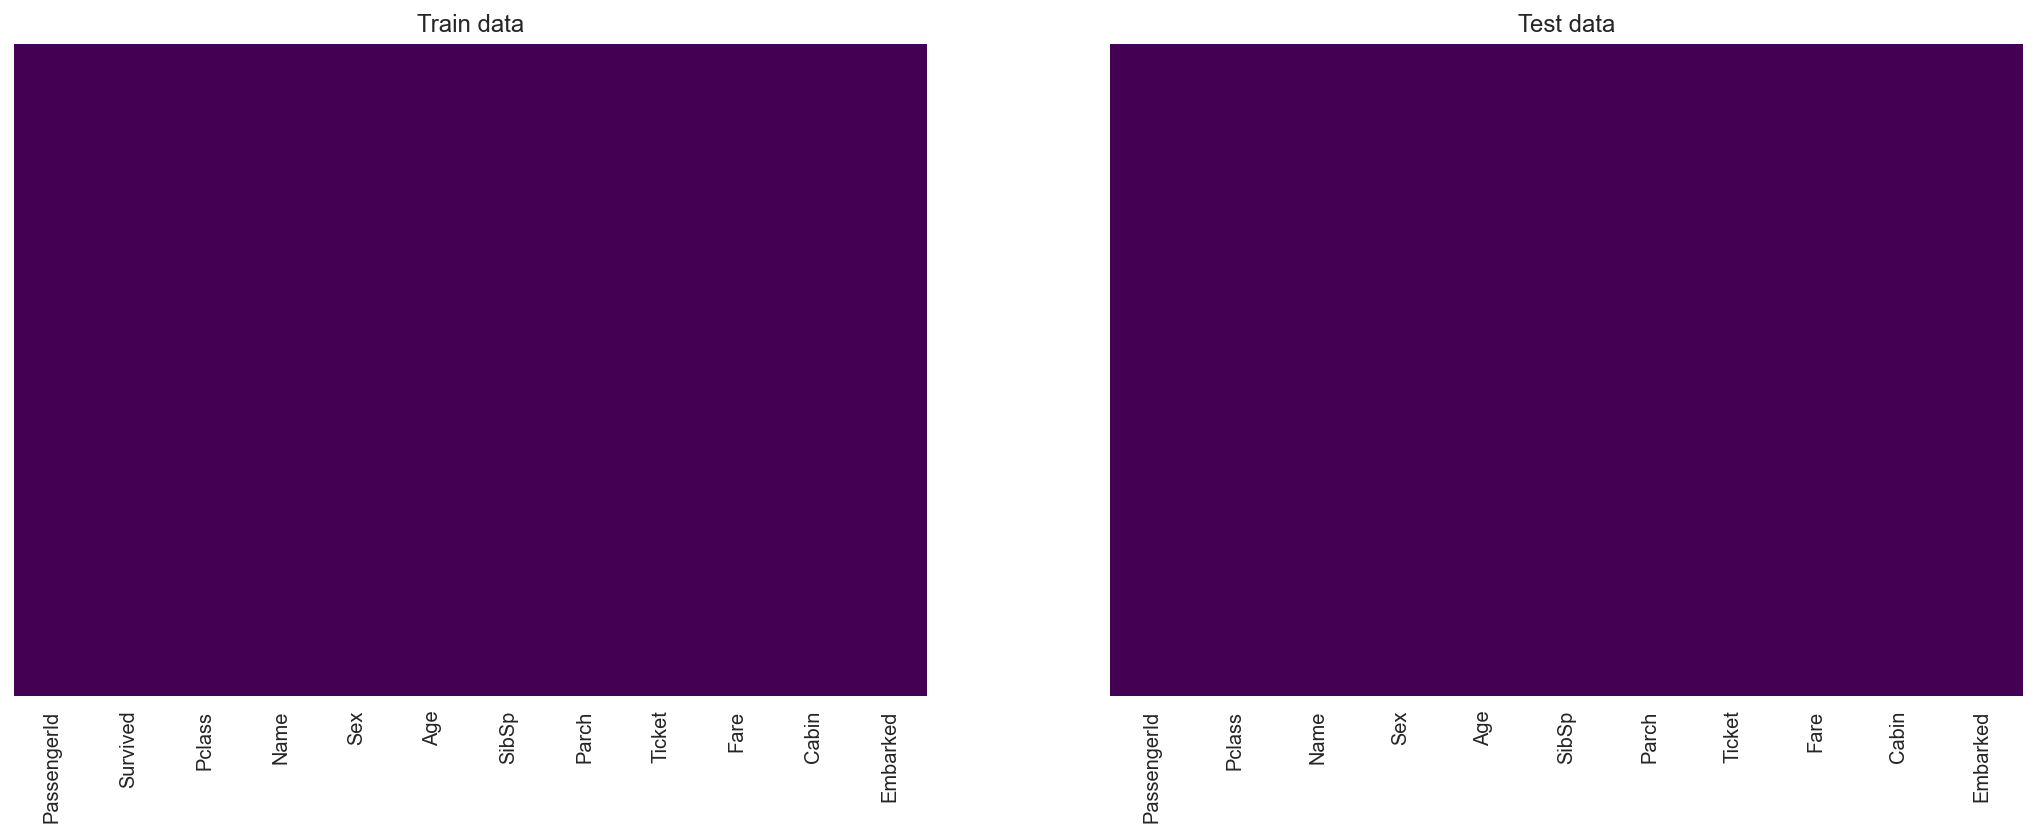

In [119]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
# train data 
sns.heatmap(train_data.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');



### Data Preprocessing and Feature Engineering

In [122]:
#encoding categorical features 'sex' and 'Embarked' on train  dataset 
train_data = pd.get_dummies(train_data, columns=['Sex'],drop_first=True)
train_data = pd.get_dummies(train_data,columns=['Embarked'],drop_first=True)

#encoding categorical features 'sex' and 'Embarked' features on test  dataset 
test_data = pd.get_dummies(test_data, columns=['Sex'],drop_first=True)
test_data = pd.get_dummies(test_data,columns=['Embarked'],drop_first=True)


In [123]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,0,1


In [124]:
#drop unnecessary features 'Name' and 'Ticket' from train dataset 
train_data=train_data.drop(['Name', 'Ticket'],axis=1)   

#drop unnecessary features 'Name' and 'Ticket' from test dataset 
test_data=test_data.drop(['Name', 'Ticket'],axis=1) 



---
#### Preparing for Visualisition
Identify the type of every variable (continuous or categorical)

In [125]:
# we divide the features to two categories numorics and categoricals
continuous_columns= ['Age','SibSp','Parch','Fare']
categorical_columns=['Pclass','Sex_male','Cabin','Embarked_Q','Embarked_S','Survived']
# print both lists
print('continue  features : ', continuous_columns)
print('categorize  features : ', categorical_columns)
train_data.head()

continue  features :  ['Age', 'SibSp', 'Parch', 'Fare']
categorize  features :  ['Pclass', 'Sex_male', 'Cabin', 'Embarked_Q', 'Embarked_S', 'Survived']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0,1


In [126]:
categorical_columns=train_data[['Pclass','Sex_male','Cabin','Embarked_Q','Embarked_S','Survived']]
# create data frame contais categorical_columns

### Data Visualization
#### Univariate Analysis:

1- Train data


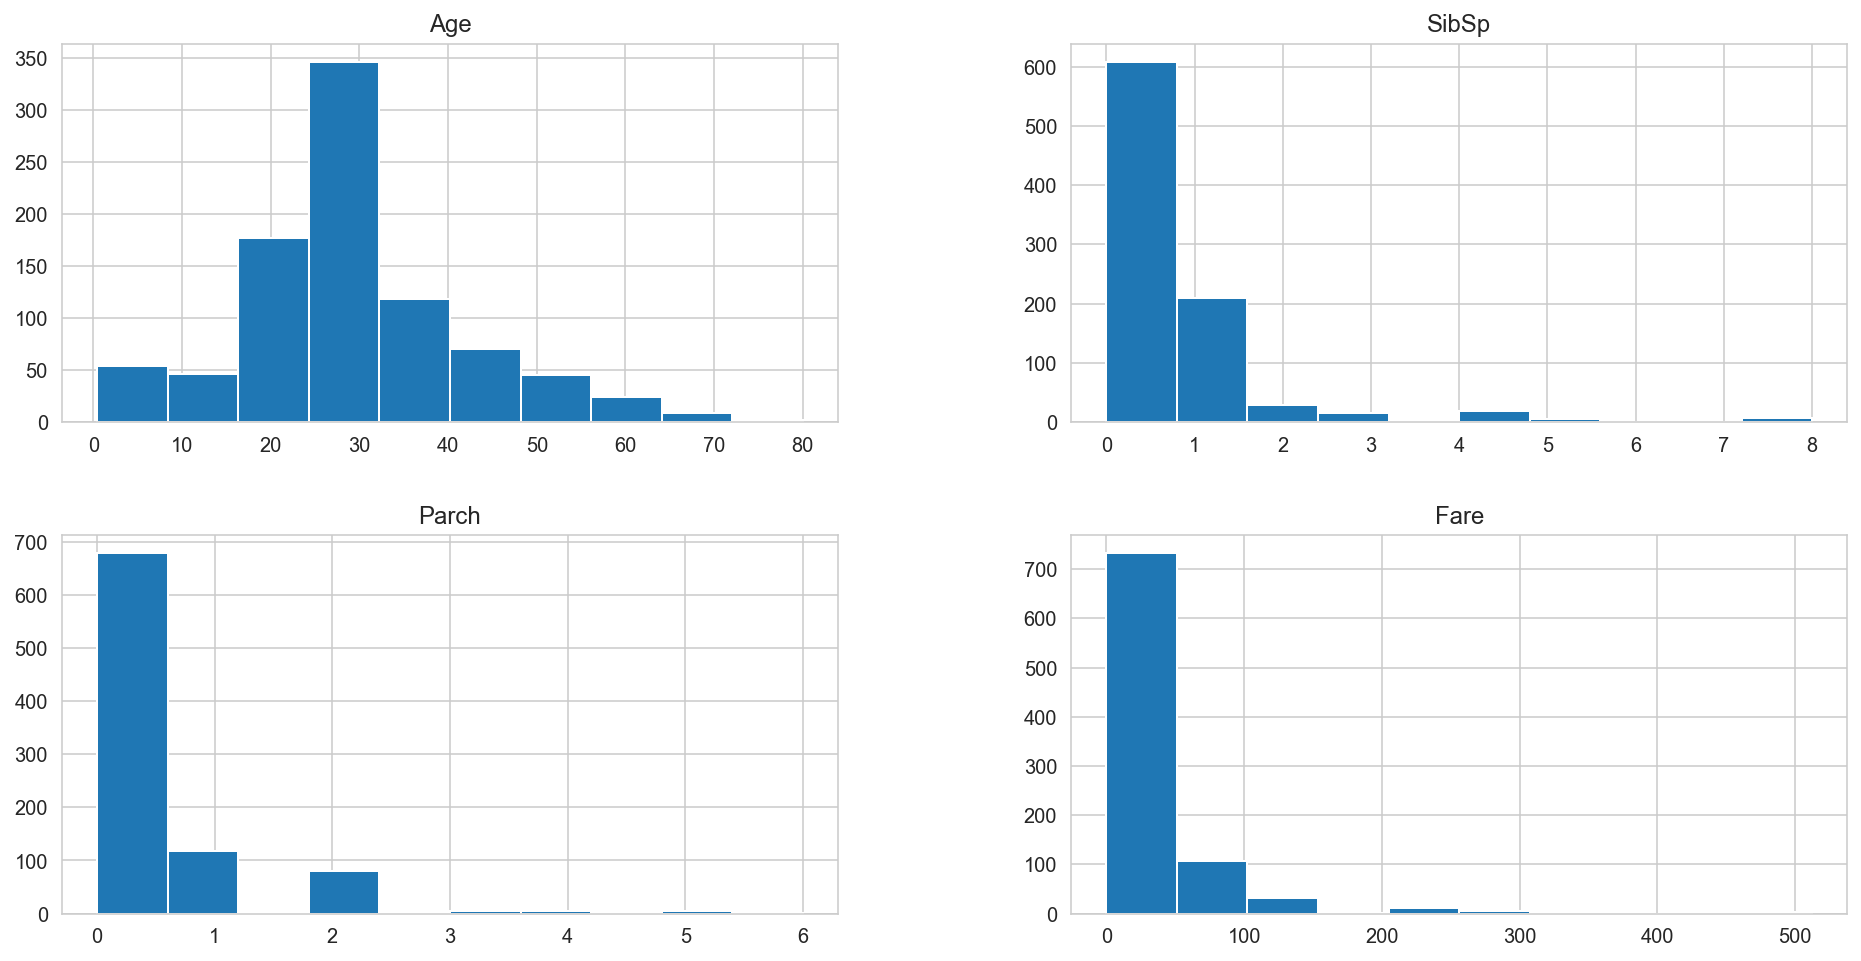

In [159]:
continuous_columns= ['Age','SibSp','Parch','Fare']
train_data.hist(column=continuous_columns, figsize=(16,8));

**we note the continuous variables on train taitanic dataset is unnormall distrbution. It is trend to positive skew.**


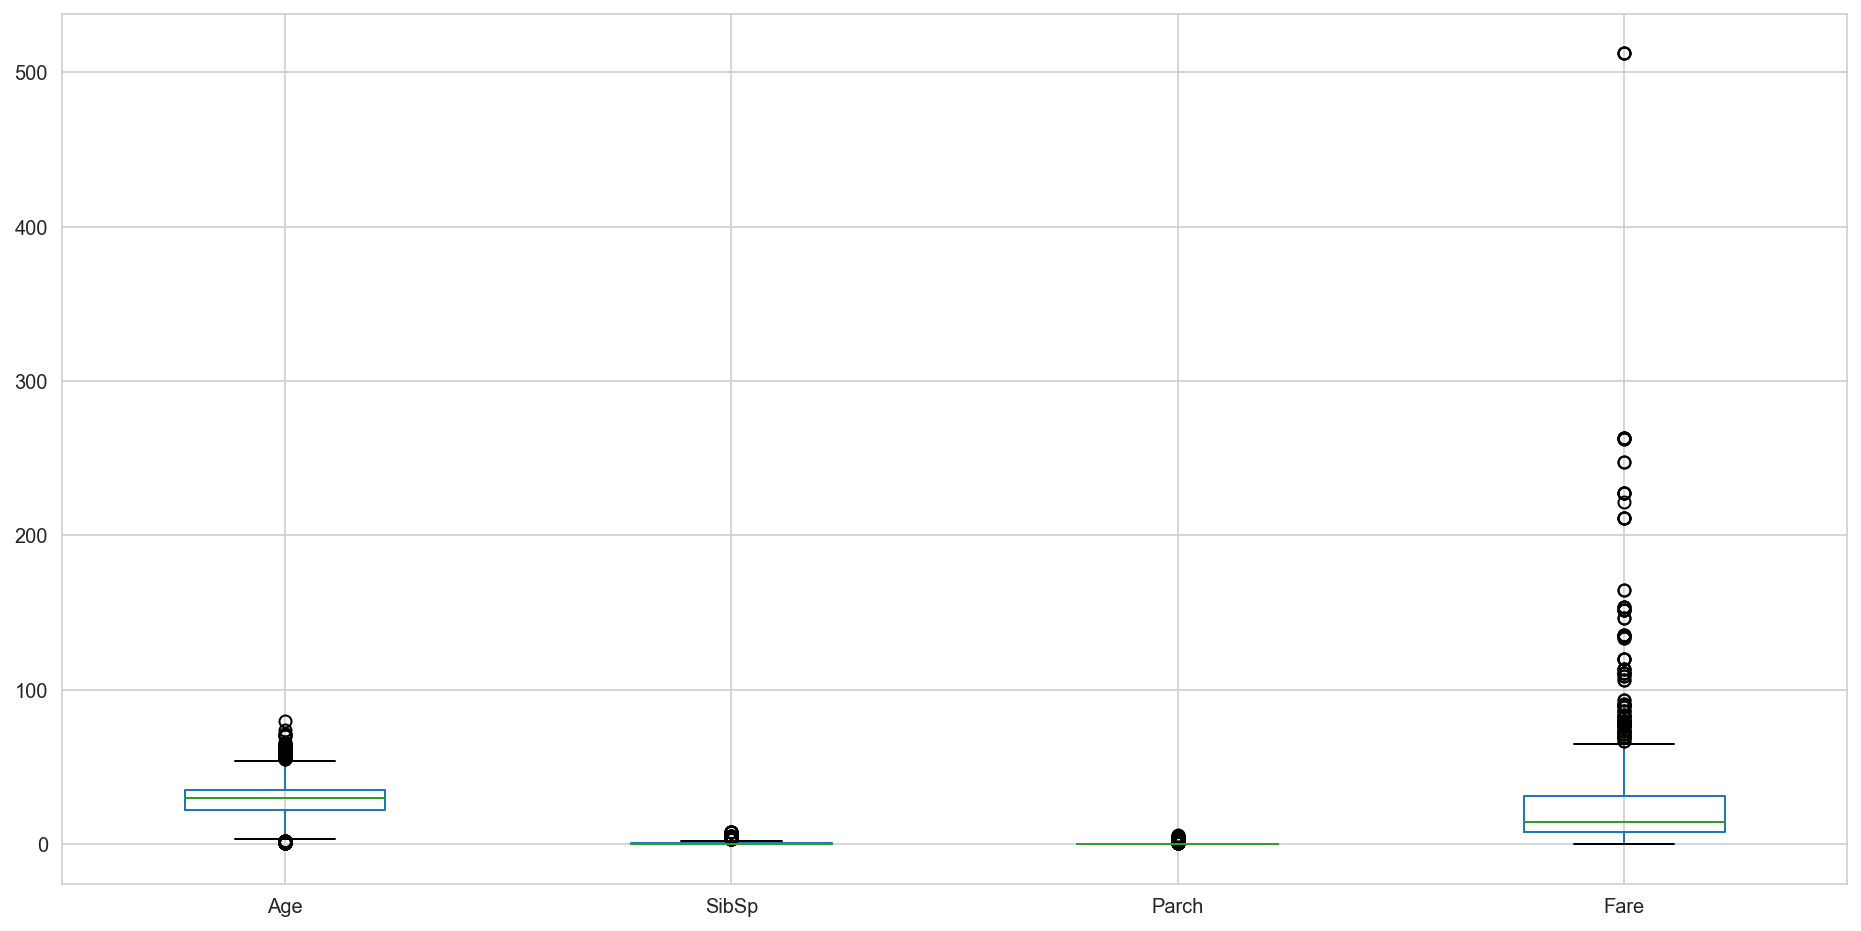

In [160]:
train_data.boxplot(column=continuous_columns, figsize=(16,8));


**We note that there are alot of outliers spesfically on 'Age' and 'Fare' features.**


2- Test data

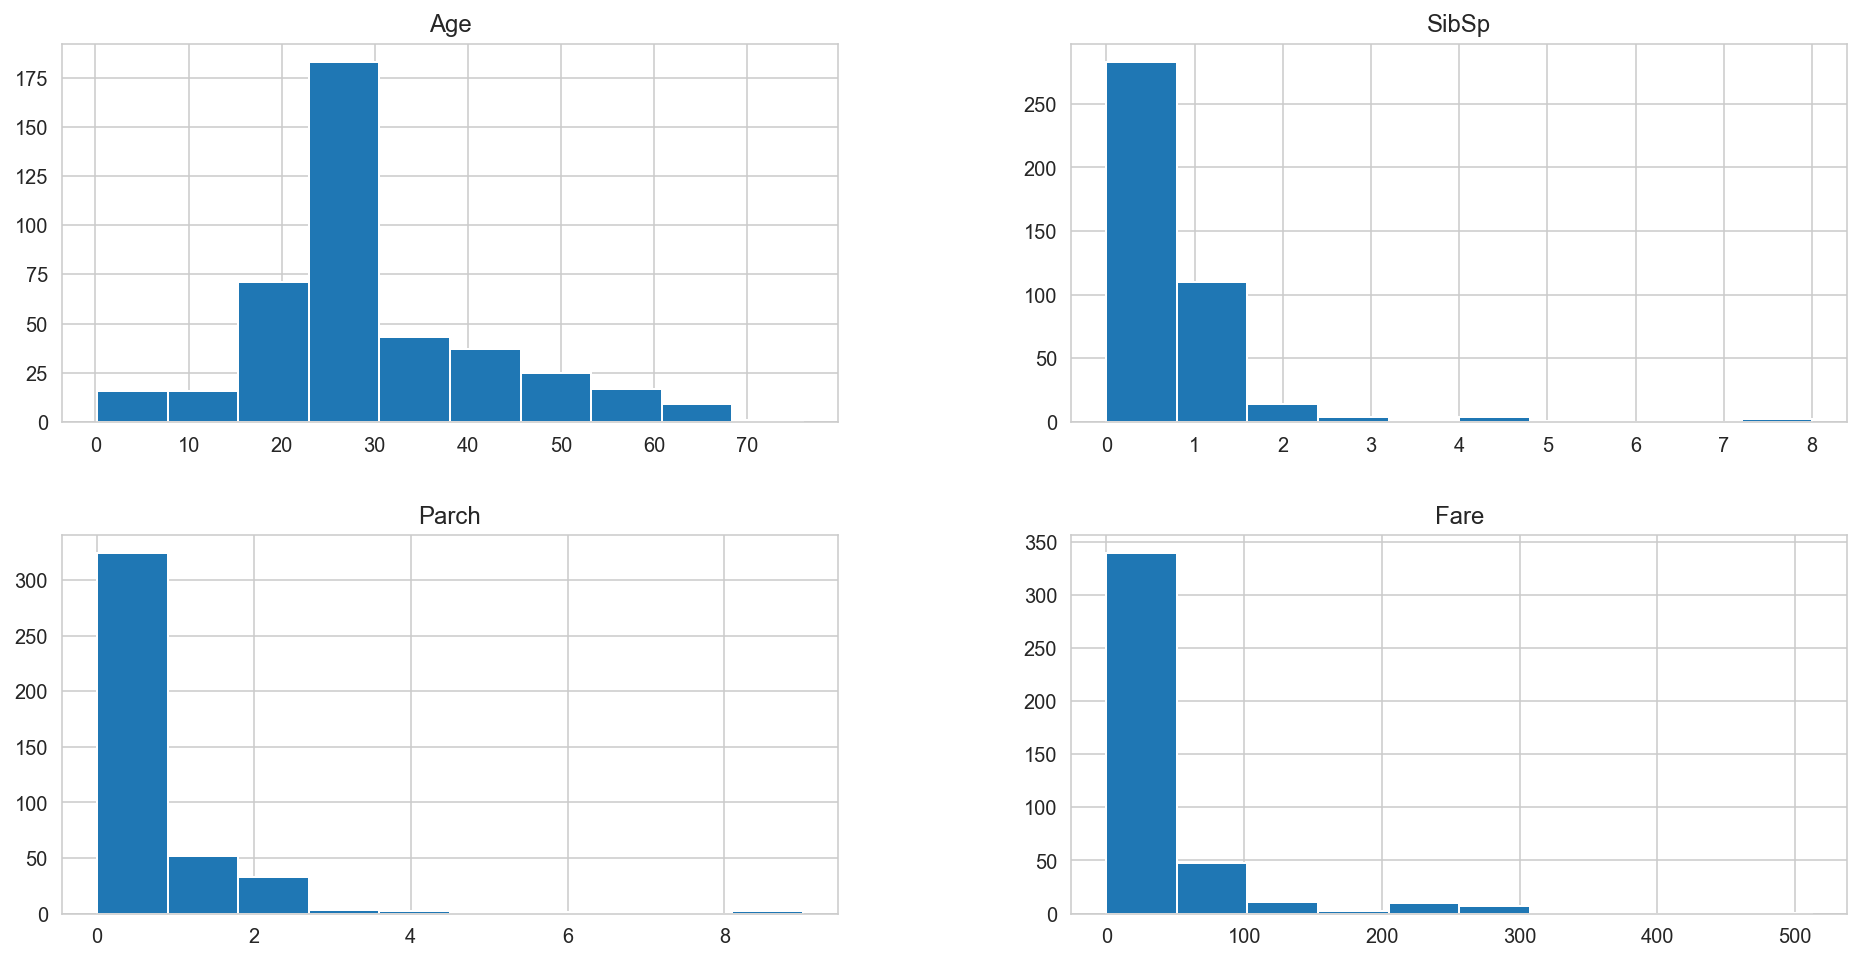

In [161]:
test_data.hist(column=continuous_columns, figsize=(16,8));


**We note the continuous variables on test taitanic dataset is unnormall distrbution. It is trend to positive skew.**

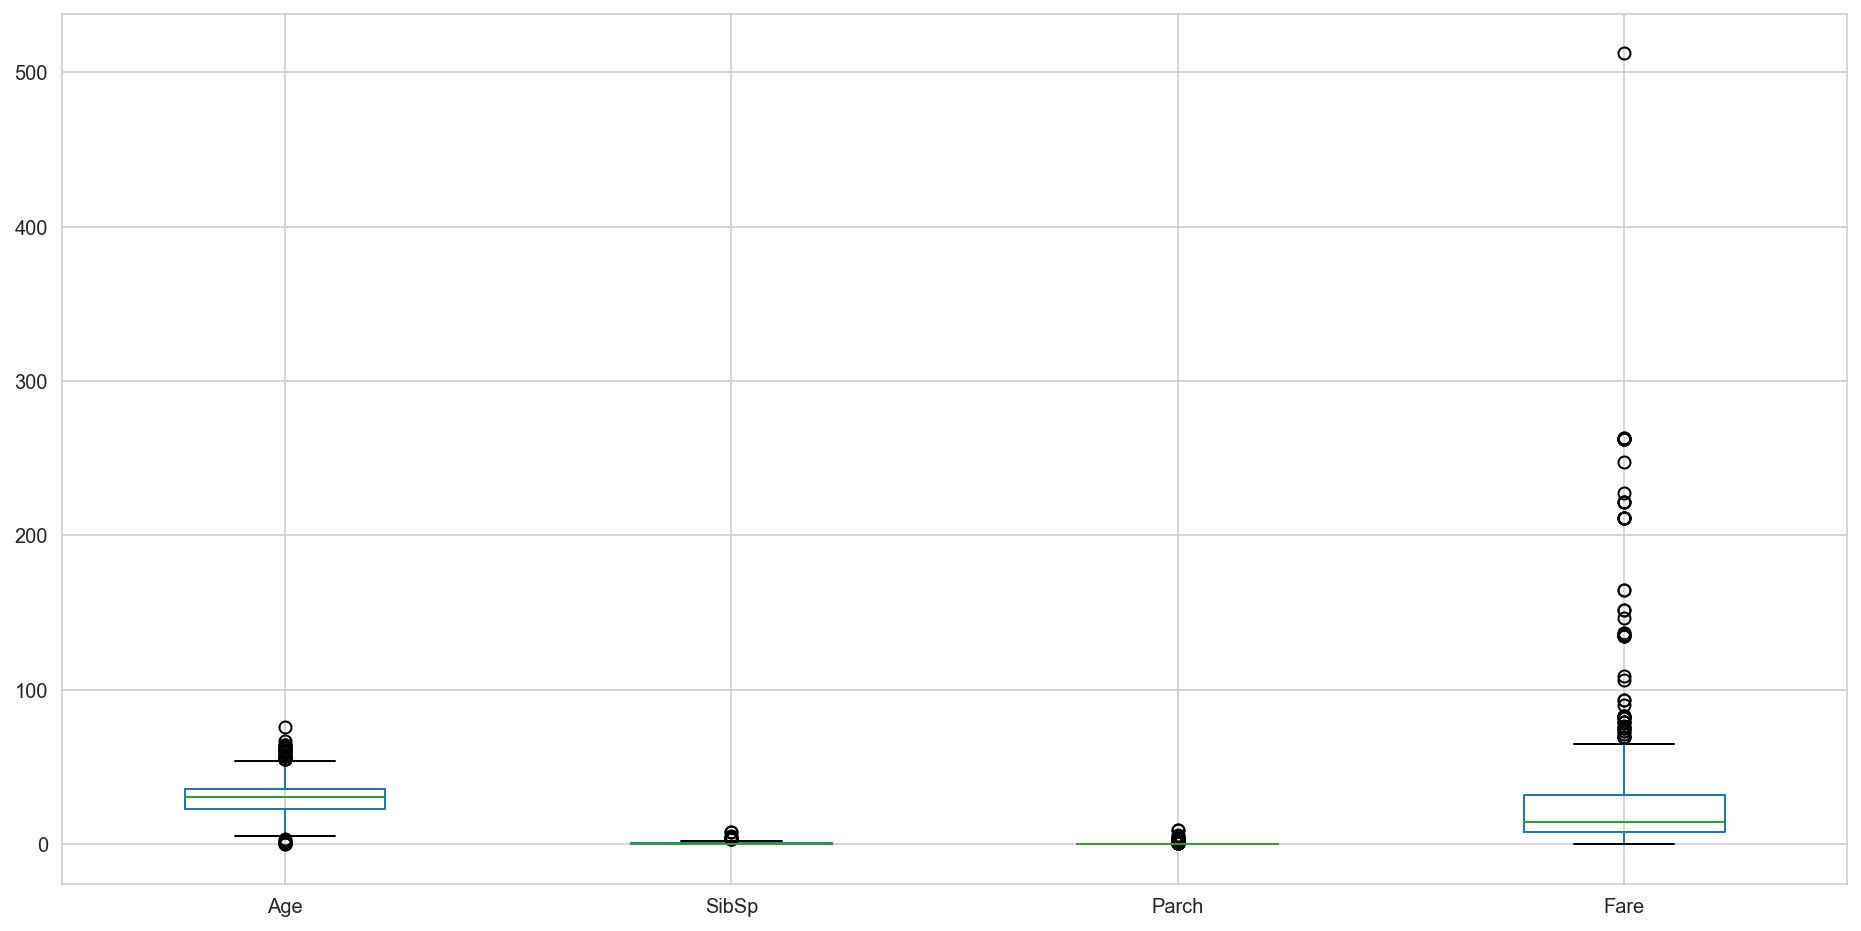

In [162]:
test_data.boxplot(column=continuous_columns, figsize=(16,8));

**As above char showung there are alot of outliers spesfically on'Age' and 'Fare' features.** 

#### visualize catigraical  features

1-Train Data

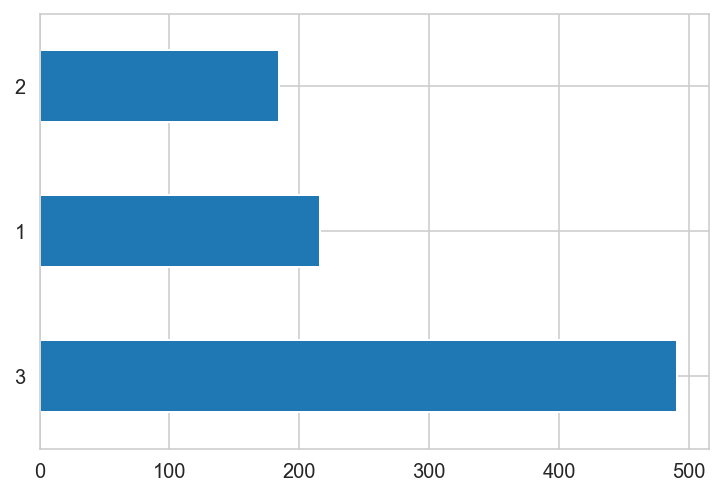

In [163]:
train_data.Pclass.value_counts().plot(kind='barh');  

2- Test Data

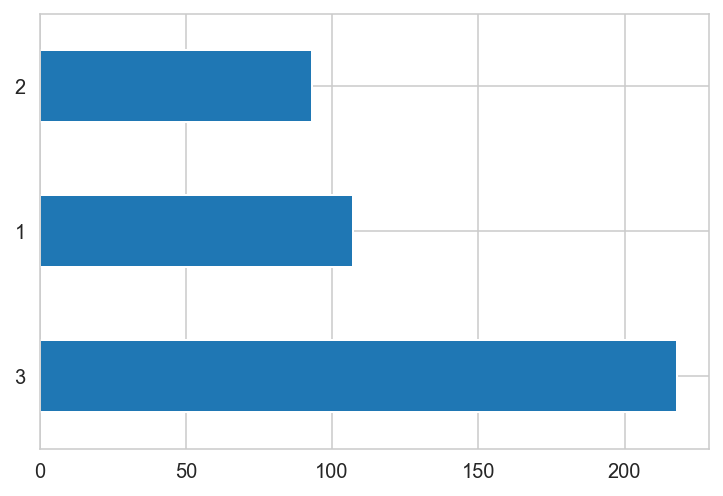

In [127]:
test_data.Pclass.value_counts().plot(kind='barh');  

**As above char showing a lot of people there were at class 3**

#### Variate Analysis:

0 Pclass
1 Sex_male
2 Cabin
3 Embarked_Q
4 Embarked_S
5 Survived


<AxesSubplot:xlabel='Pclass'>

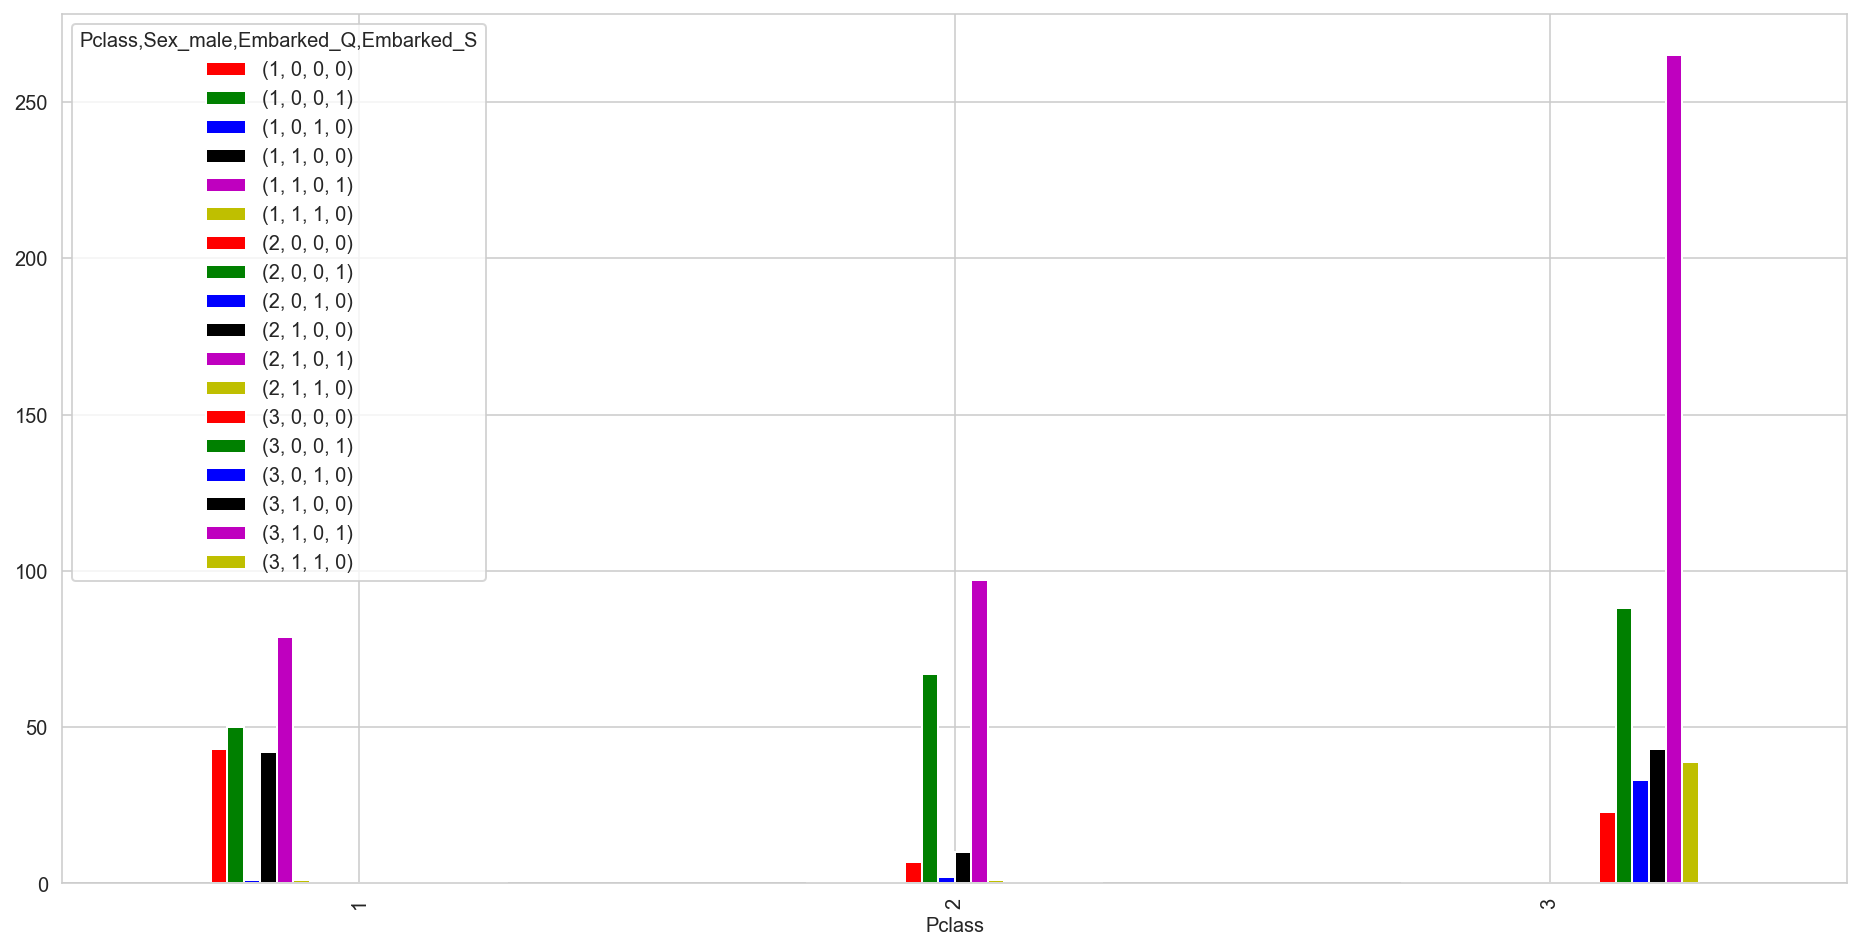

In [164]:
cn=list(categorical_columns.columns)

for i, column in enumerate(cn): 
    print(i,column)

group_counts = categorical_columns.groupby(['Pclass','Sex_male','Embarked_Q','Embarked_S']).count().reset_index()
# do pivot table
table = pd.pivot_table(group_counts, index='Pclass', columns=['Pclass','Sex_male','Embarked_Q','Embarked_S'], values='Survived')
# set your own colors here
table.plot(kind='bar', color=['r', 'g', 'b', 'k', 'm', 'y'],figsize=(16,8))

<AxesSubplot:xlabel='Pclass,Sex_male,Embarked_Q,Embarked_S'>

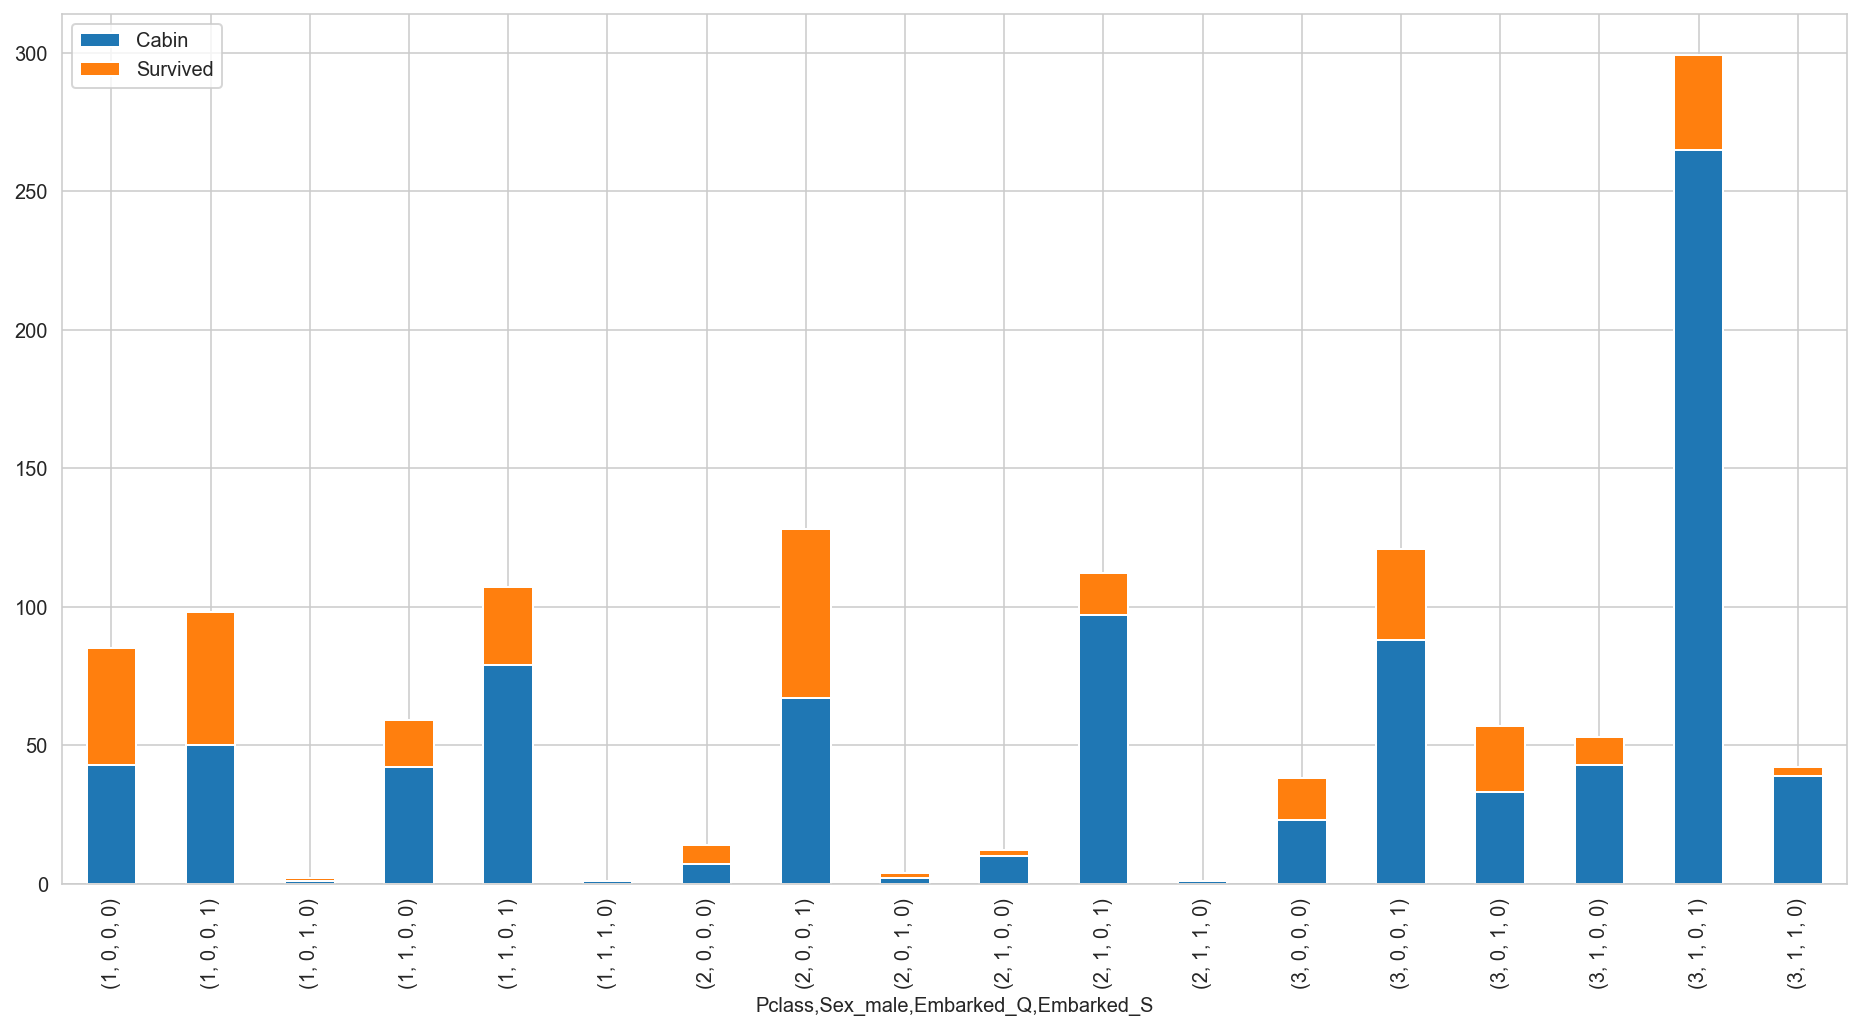

In [130]:

import seaborn as sns
categorical_columns.groupby(['Pclass','Sex_male','Embarked_Q','Embarked_S']).sum().plot(kind='bar',stacked=True,
                                                                            figsize=(16,8))

<AxesSubplot:xlabel='Pclass,Sex_male,Cabin,Embarked_Q,Embarked_S'>

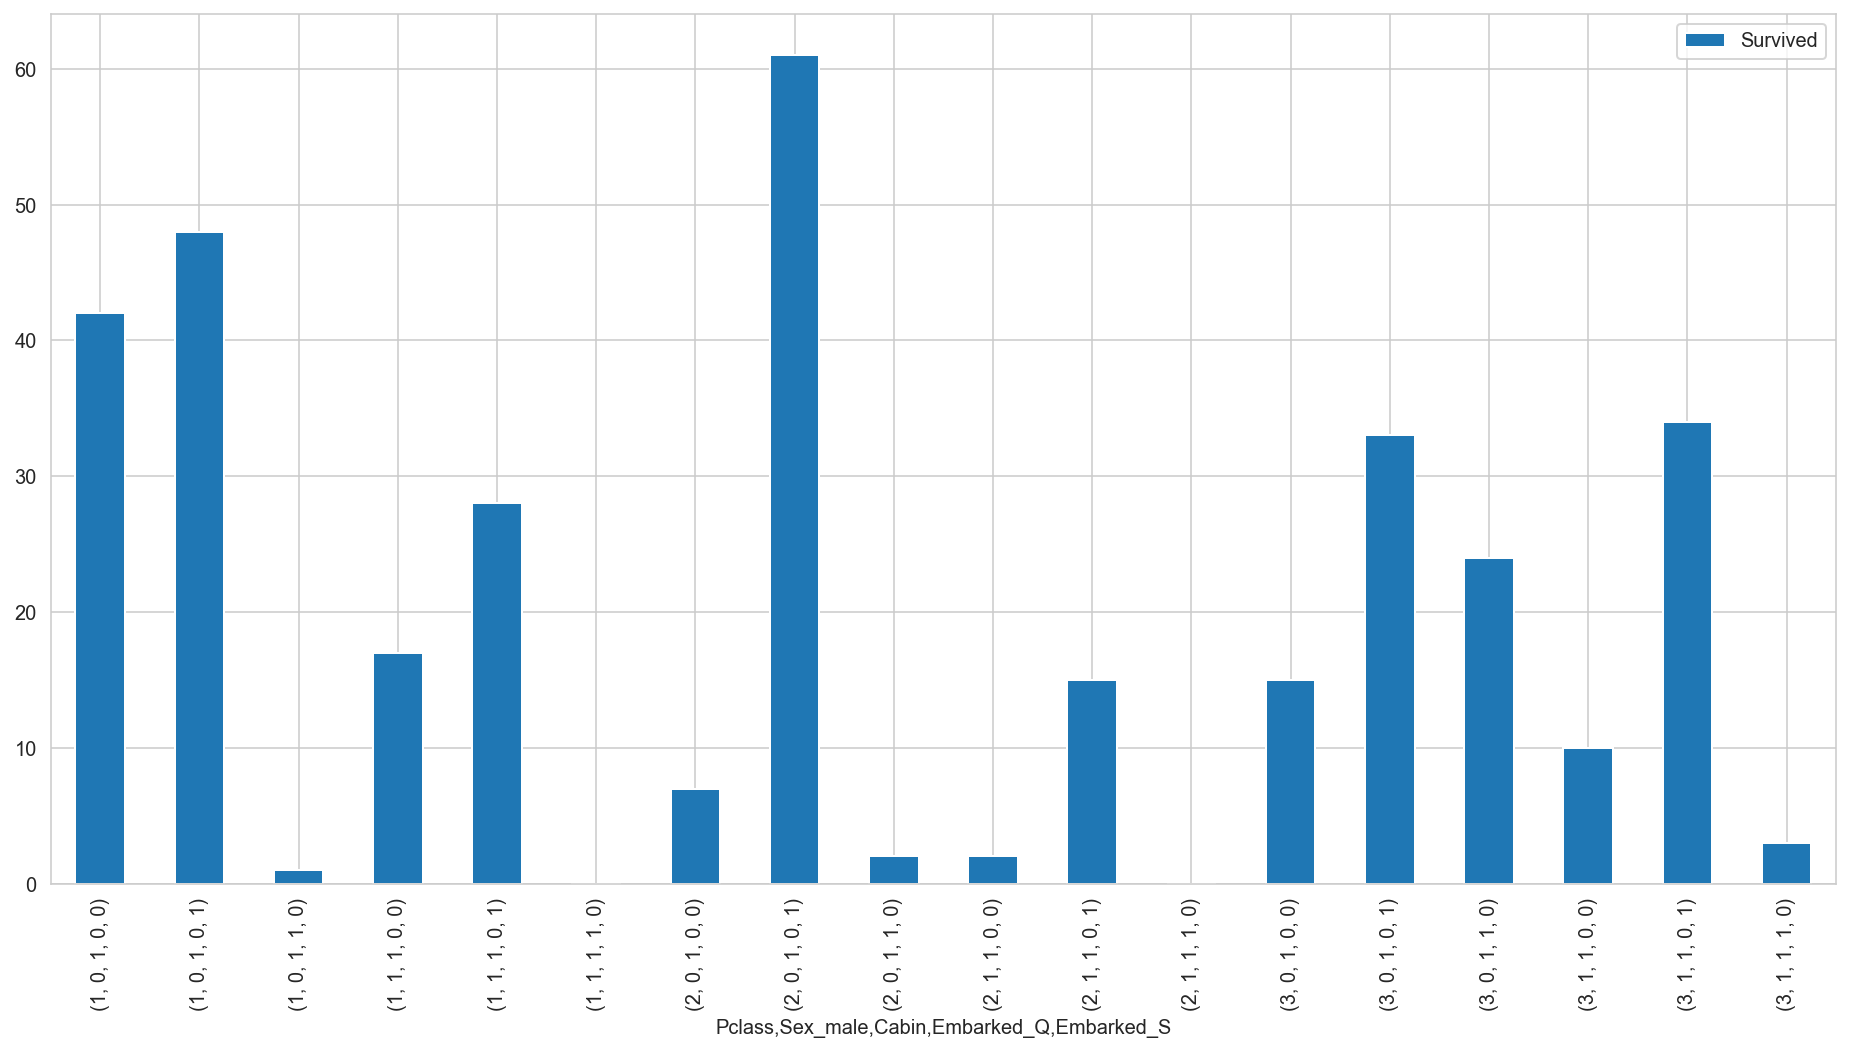

In [131]:

import seaborn as sns
categorical_columns.groupby(['Pclass','Sex_male','Cabin','Embarked_Q','Embarked_S']).sum().plot(kind='bar',stacked=True,
                                                                            figsize=(16,8))

**From all above graphs we can note, the meal at class 1 and Embarked (Q) has least a chance to survive. the women at class 2 has highest chance to survive.**

Text(0.5, 1.0, 'Survived v UnSurvived')

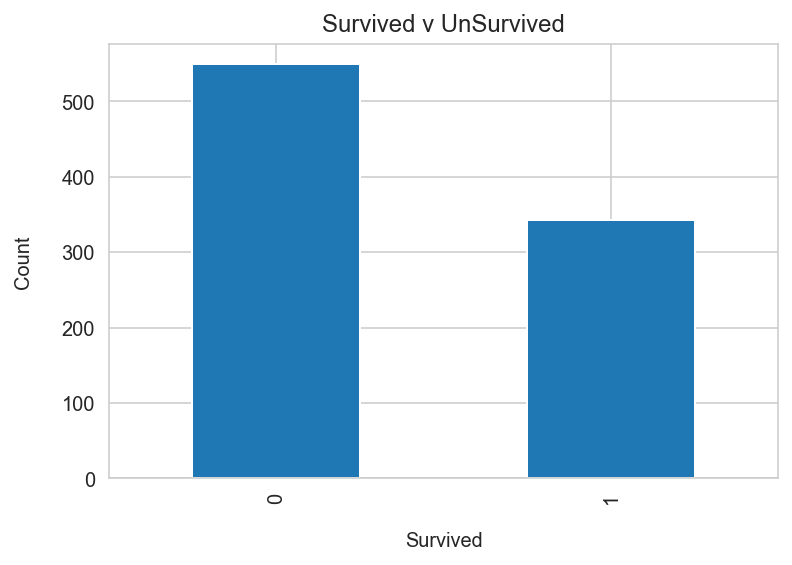

In [128]:
#we use a countplot() to see how many people survived and how many died?
train_data['Survived'].value_counts().plot(kind='bar')
plt.xlabel("Survived", labelpad=14)
plt.ylabel("Count", labelpad=14);
plt.title("Survived v UnSurvived")

**Unfortunately,a lot of people did not survive**

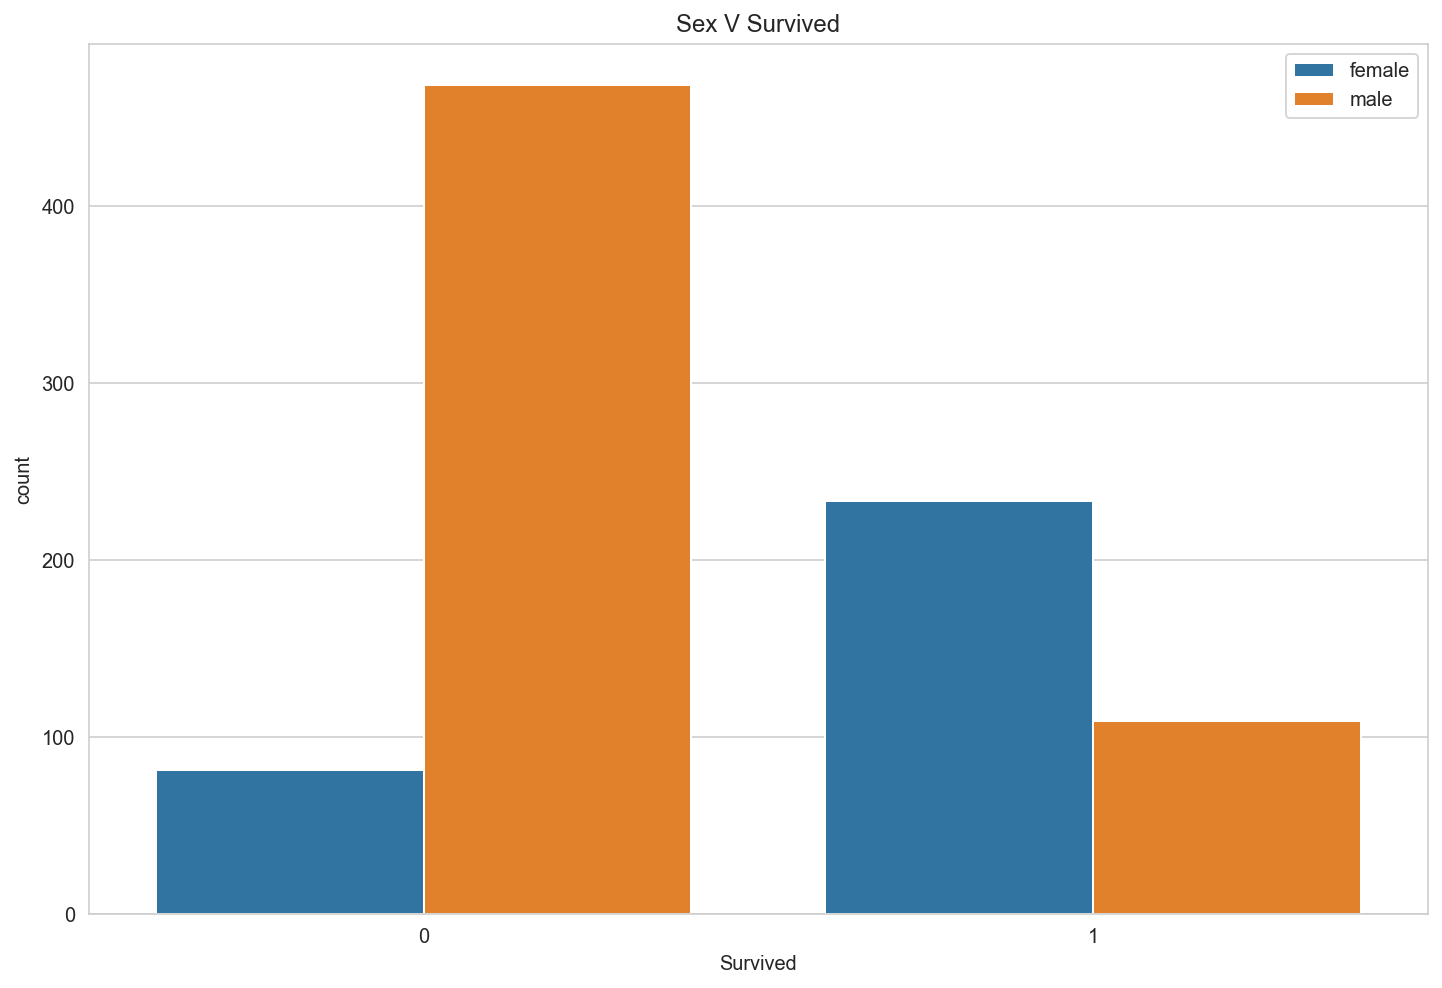

In [59]:
#we use hue to see which gender survived the most.
f,ax=plt.subplots(1,figsize=(12,8))
sns.countplot('Survived', hue='Sex_male',data=train_data,ax=ax)
plt.legend(['female', 'male'])
ax.set_title('Sex V Survived')
plt.show()

**we note the most female survied than male**

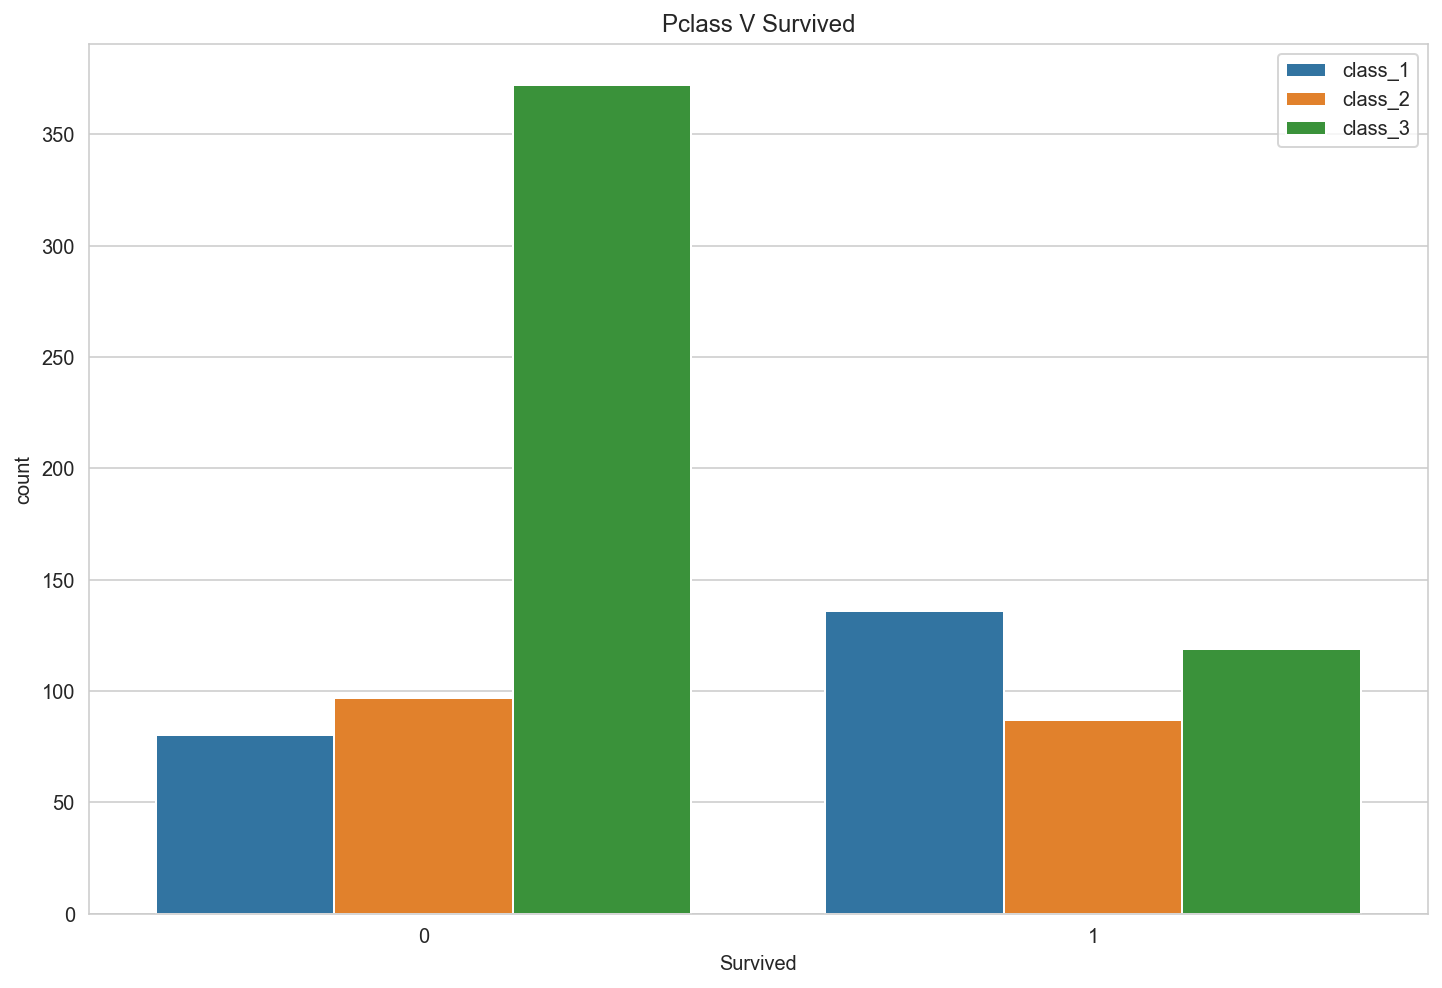

In [60]:
#if people who bought upper class seats survived more than people who bought lower class seats.  
f,ax=plt.subplots(1,figsize=(12,8))
sns.countplot('Survived', hue='Pclass',data=train_data,ax=ax)
plt.legend(['class_1', 'class_2','class_3'])
ax.set_title('Pclass V Survived')
plt.show()

**Based on above chart we can say the people from the upper class (class_1) survived more than other**

#### The linear correlations between the numeric variable

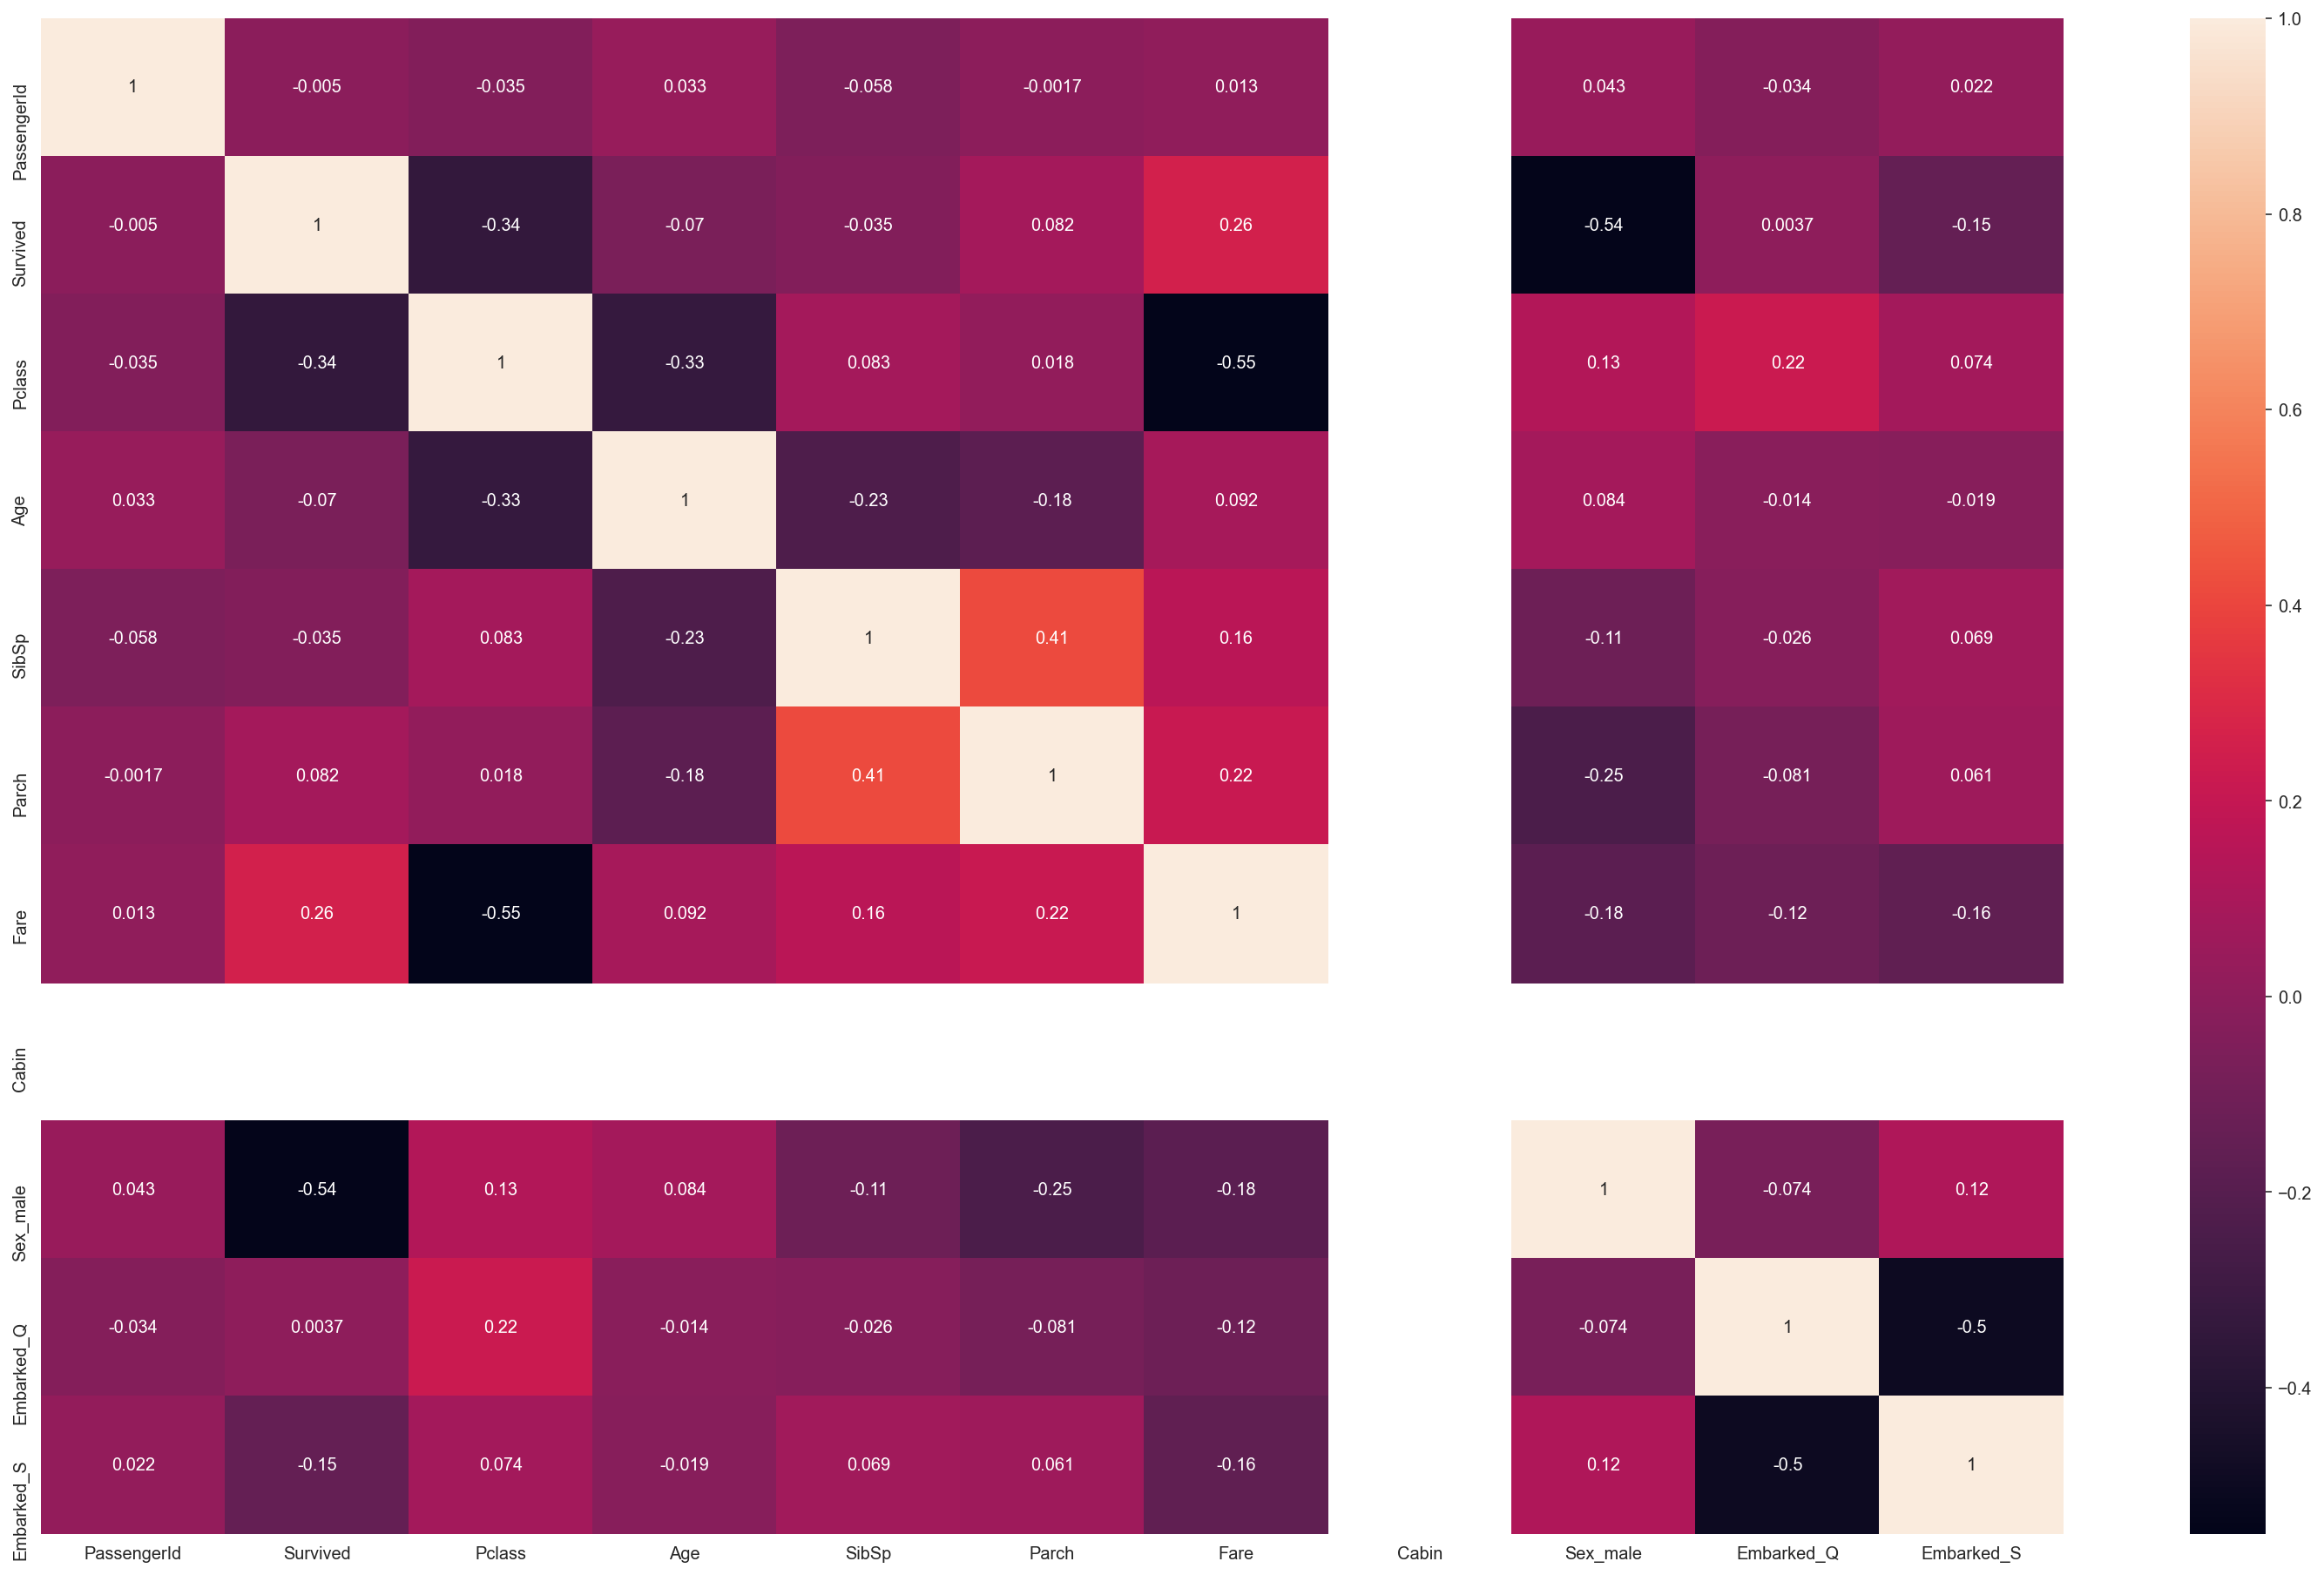

In [134]:

plt.figure(figsize=(26,16))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

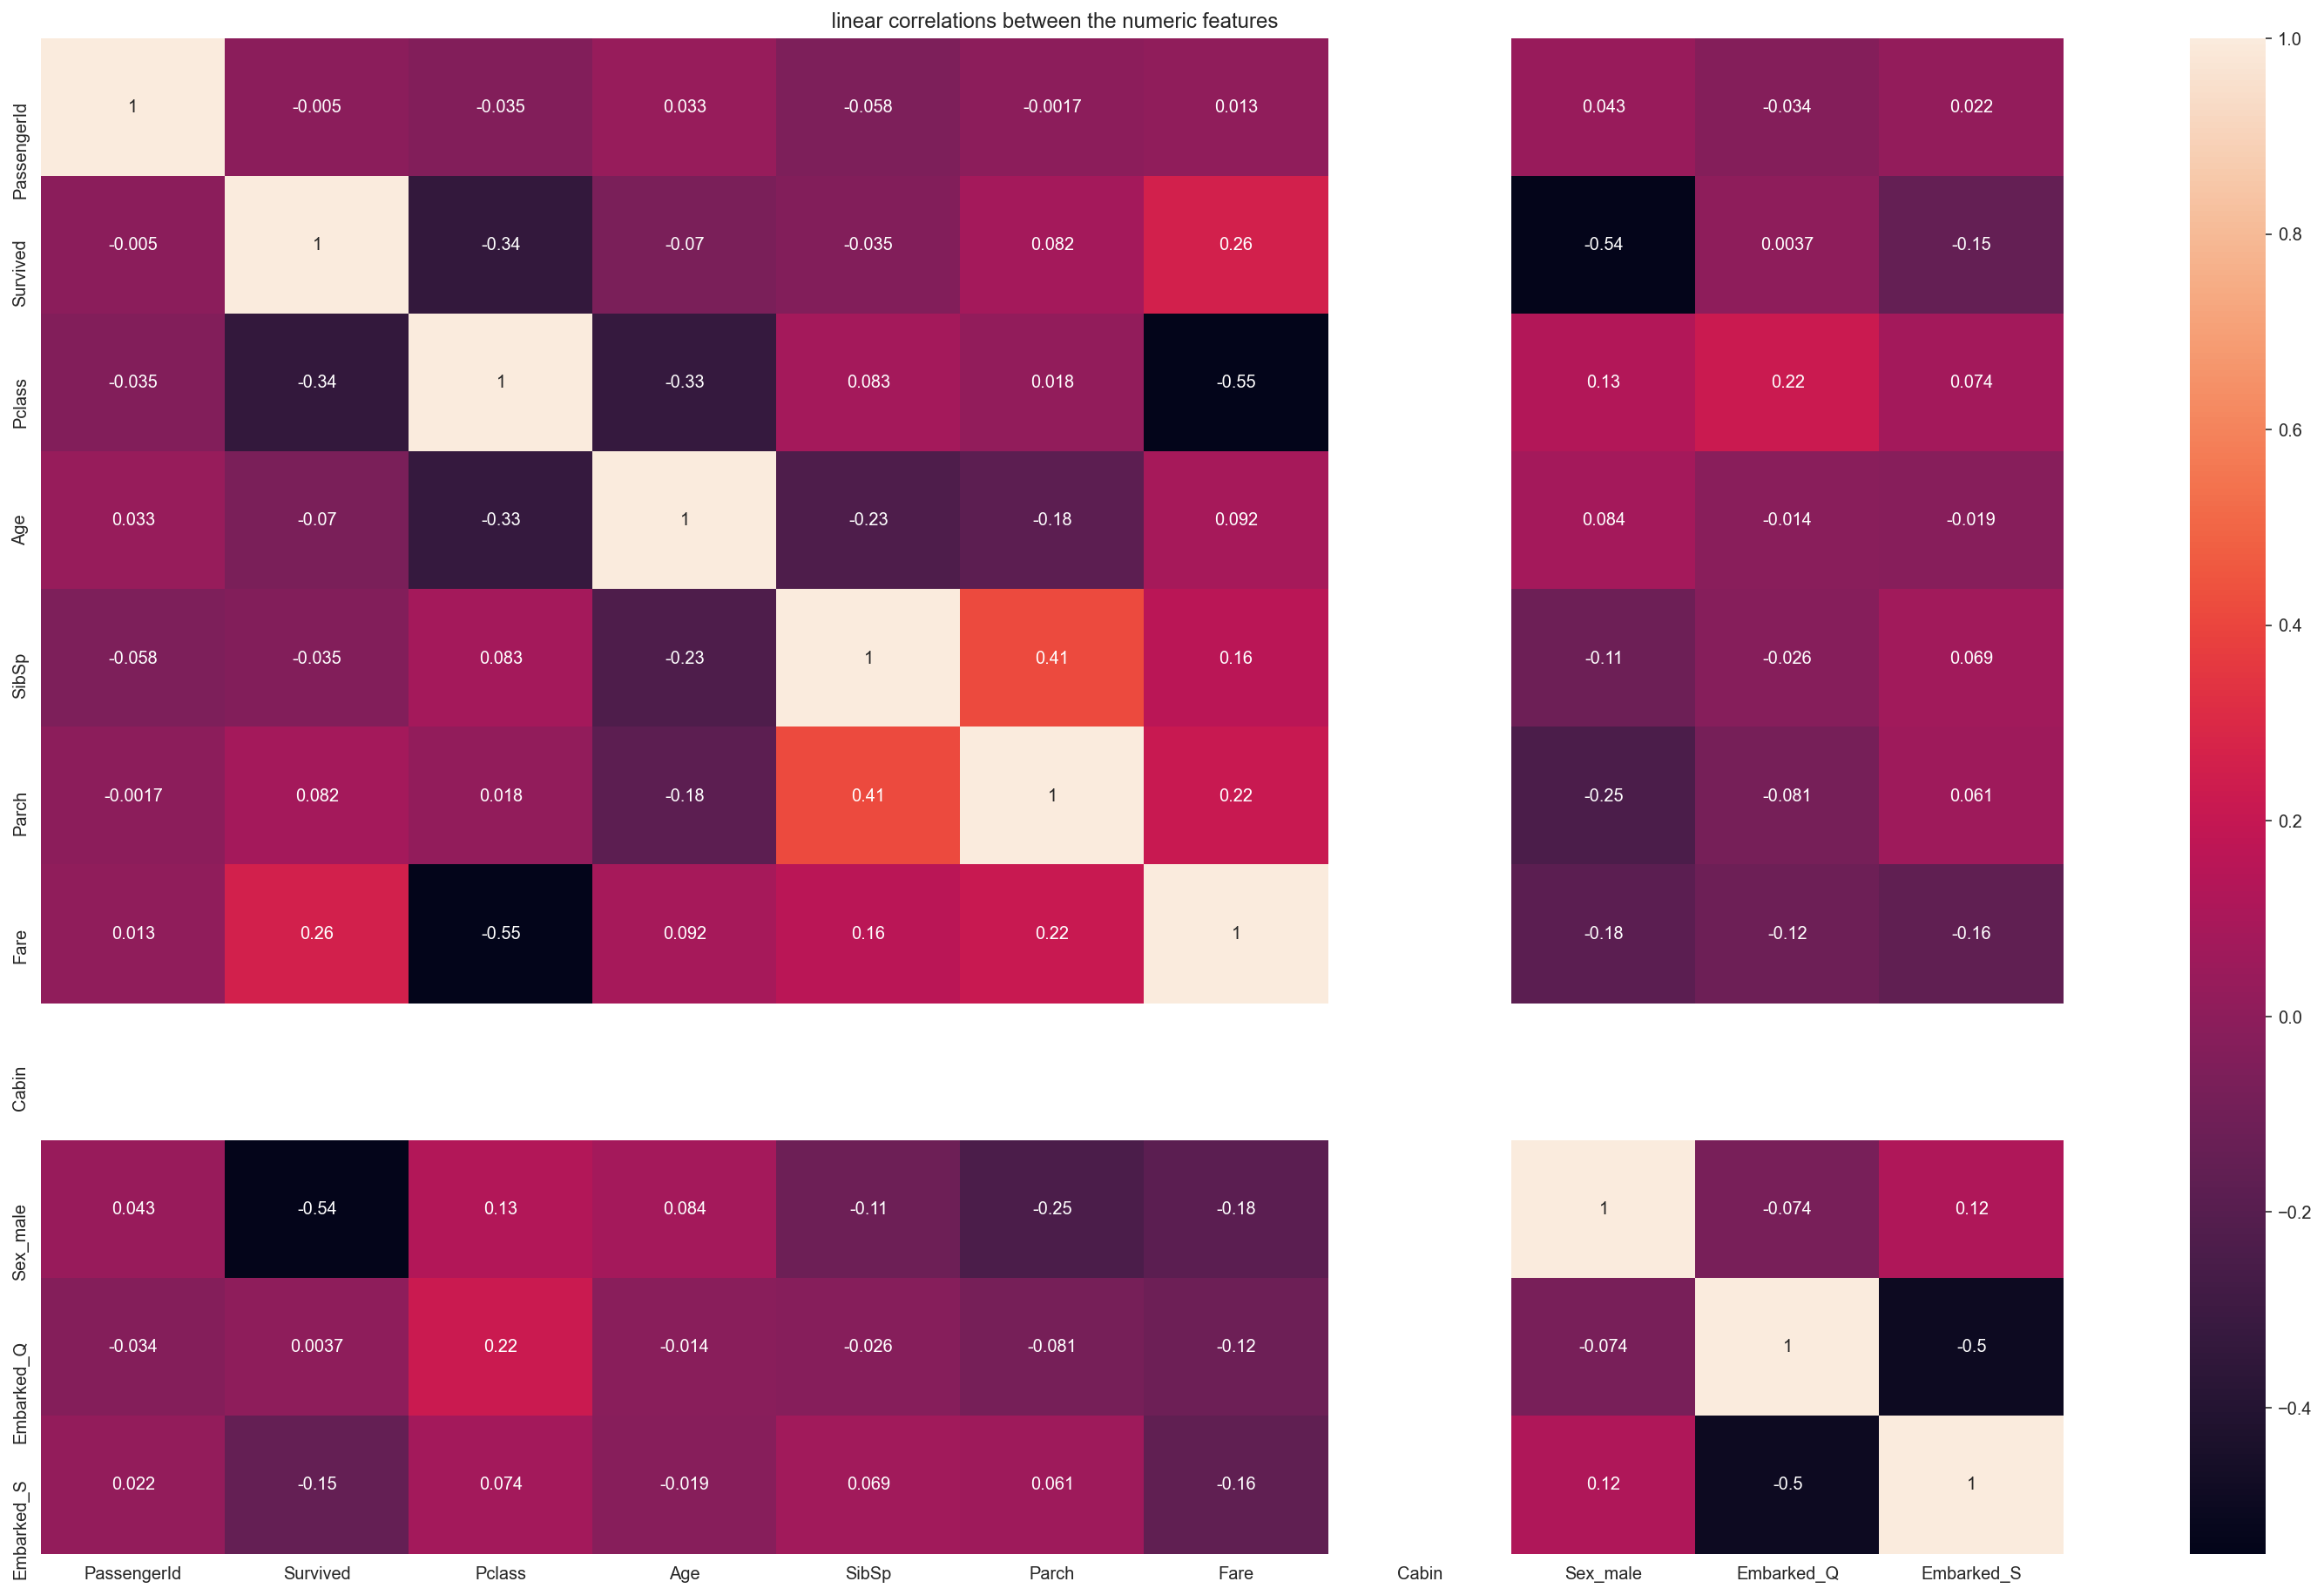

In [132]:

train_data.corr()
plt.figure(figsize=(26,16))
sns.heatmap(train_data.corr(), annot=True)
plt.title(" linear correlations between the numeric features")
plt.show()


In [61]:
#now assign the value for each X_train_data,y_train_data,X_test_data 
#drop 'PassengerId'column because they are useless
X_train_data=train_data.drop(['PassengerId', 'Survived'],axis=1)#drop survived because it is a target 
y_train_data=train_data['Survived']#assign target
X_test_data=test_data.drop(['PassengerId'],axis=1) #did te same in X_test
X_train_data.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


### Build a baseline model

In [62]:
print(' baseline model on train data: ')
train_data.Survived.value_counts()/len(train_data.Survived)

 baseline model on train data: 


0    0.616162
1    0.383838
Name: Survived, dtype: float64

---

## Modelling


### 1- Logistic-Regression
##### Pipline includes (Standard_Scaler, Grid_Search, Logistic_Regression)

In [171]:
# Instantiate pipeline object.
lr_pipe = Pipeline([
    ('sscaler2', StandardScaler()),
    ('logreg2', LogisticRegression(penalty='l1', C=0.1, solver='liblinear'))
])

In [172]:
# Define dictionary of hyperparameters.
lr_pipe_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'logreg2__C': [0.1, 0.2,0.3], 
                 'logreg2__fit_intercept': [True, False],
                 'logreg2__penalty': ['l1', 'l2']}

In [173]:
# Instantiate our GridSearchCV object.
lr_pipe_gridsearch = GridSearchCV(lr_pipe, # What is the model we want to fit?
                                 lr_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [174]:
# Fit the GridSearchCV object to the data.
lr_pipe_gridsearch.fit(X_train_data, y_train_data);

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    4.3s finished


In [175]:
#print best score and best parameters
print('The best score' ,lr_pipe_gridsearch.best_score_)
print('The score after GridSearch',lr_pipe_gridsearch.score(X_train_data, y_train_data))
print('the best parameters :')
print( lr_pipe_gridsearch.best_params_)


The best score 0.7946142740568702
The score after GridSearch 0.8024691358024691
the best parameters :
{'logreg2__C': 0.1, 'logreg2__fit_intercept': False, 'logreg2__penalty': 'l2', 'sscaler2__with_mean': False, 'sscaler2__with_std': False}


In [176]:
#prediction for the best model in pred_lr_best on Train data
trainpredect_LR=lr_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred__best on Test data
testpred_LR= lr_pipe_gridsearch.predict(X_test_data)


In [177]:
#print traindata accuracy score
print(metrics.accuracy_score(y_train_data, trainpredect_LR))# the accuracy of train data

0.8024691358024691


In [178]:
#print train confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpredect_LR)#cofusion matrex
print(confusion_matrix)


[[482  67]
 [109 233]]


In [179]:
#print report of model on traindata
print(metrics.classification_report(y_train_data, trainpredect_LR))#print the report that show

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       549
           1       0.78      0.68      0.73       342

    accuracy                           0.80       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [183]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
best_lr_df=pd.DataFrame(testpred_LR,test_data['PassengerId']).reset_index()
best_lr_df.rename(columns={0:'Survived'}, inplace=True)
best_lr_df.head()# show the dataframe

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [184]:
best_lr_df.to_csv('FillKNN_best_LRP_MMN.csv',index=False) #save the dataframe as CSV format file to submitted in kaggle

fillKNN_LR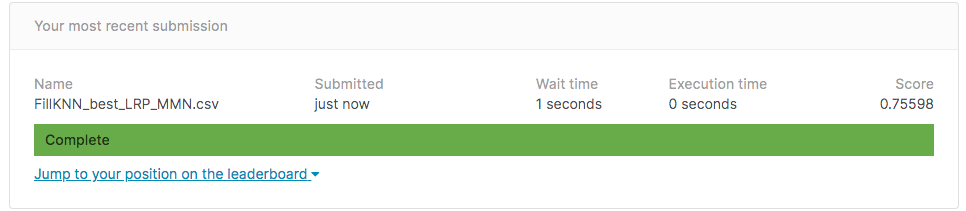

In [185]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_lr = cross_val_score(lr_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Logistic Regression ", "Train", s_lr.mean().round(3)))

Logistic Regression  Train Score:	0.789 


### 2- Knn-Classifier

#### Pipline includes (Standard_Scaler, Grid_Search, Knn)

In [186]:
# Instantiate pipeline object.
KNN_pipe = Pipeline([
    ('sscaler2', StandardScaler()),#did standerisation to scale the value of features
    ('KNN', KNeighborsClassifier())
])

In [187]:
# Define dictionary of hyperparameters.
KNN_pipe_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'KNN__n_neighbors': [2,3, 5, 7, 9, 11, 20], #select number of neighbors
                 'KNN__weights': ['uniform', 'distance'],
                 'KNN__metric': ['manhattan', 'euclidean']}


In [188]:
# Instantiate our GridSearchCV object.
KNN_pipe_gridsearch = GridSearchCV(KNN_pipe, # What is the model we want to fit?
                                 KNN_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 scoring='roc_auc',
                                   verbose=1)

In [189]:
# Fit the GridSearchCV object to the data.
KNN_pipe_gridsearch.fit(X_train_data, y_train_data);

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:   10.0s finished


In [190]:
#print best score and best parameters
print('The best score' ,KNN_pipe_gridsearch.best_score_)
print('The score after GridSearch',KNN_pipe_gridsearch.score(X_train_data, y_train_data))
print('the best parameters :')
print( KNN_pipe_gridsearch.best_params_)

The best score 0.8632276897414514
The score after GridSearch 0.9189754897261367
the best parameters :
{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9, 'KNN__weights': 'uniform', 'sscaler2__with_mean': True, 'sscaler2__with_std': True}


In [191]:
#prediction for the best model in pred_lr_best on Train data
trainpredect_KNN=KNN_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred__best on Test data
testpred_KNN= KNN_pipe_gridsearch.predict(X_test_data)

In [192]:
print(metrics.accuracy_score(y_train_data, trainpredect_KNN))

0.8484848484848485


In [193]:
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpredect_KNN)
print(confusion_matrix)


[[500  49]
 [ 86 256]]


In [194]:
print(metrics.classification_report(y_train_data, trainpredect_KNN))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       549
           1       0.84      0.75      0.79       342

    accuracy                           0.85       891
   macro avg       0.85      0.83      0.84       891
weighted avg       0.85      0.85      0.85       891



In [195]:
testpred_KNN


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [196]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,1,0
3,895,3,27.0,0,0,8.6625,1,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1


In [197]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
KNN_predictions_df=pd.DataFrame(testpred_KNN,test_data['PassengerId']).reset_index()
KNN_predictions_df.rename(columns={0:'Survived'}, inplace=True)
KNN_predictions_df.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [198]:
KNN_predictions_df.to_csv('FillKNN_KNN_MMN.csv',index=False)#save the dataframe as CSV format file to submitted in kaggle

FillKNN_KNN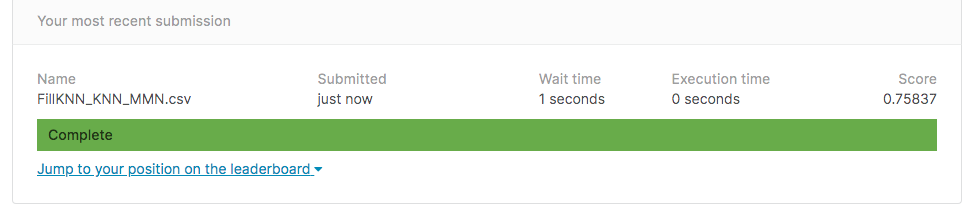

In [218]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_knn = cross_val_score(KNN_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Knn  ", "Train", s_knn.mean().round(3)))

Knn   Train Score:	0.854 



### 3- Decision Tree

In [203]:
# Instantiate pipeline object.
DT_pipe = Pipeline([
    ('sscaler2', StandardScaler()),#did standerisation to scale the value of features
    ('DT', DecisionTreeClassifier())
])

In [204]:
# Define dictionary of hyperparameters.
DT_pipe_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'DT__min_samples_split':[1,2,3],
                 'DT__max_features':[2, 3, 5, 7, 8,9],
                 'DT__max_depth': [1, 2, 3, 4, 5, 8],
                 'DT__criterion':['gini', 'entropy']
                  }

In [205]:
# Instantiate our GridSearchCV object.
DT_pipe_gridsearch = GridSearchCV(DT_pipe, # What is the model we want to fit?
                                 DT_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 scoring='roc_auc',
                                   verbose=1)

In [206]:
# Fit the GridSearchCV object to the data.
DT_pipe_gridsearch.fit(X_train_data, y_train_data);

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:  1.1min finished


In [207]:
#print best score and best parameters
print('The best score' ,DT_pipe_gridsearch.best_score_)
print('The score after GridSearch',DT_pipe_gridsearch.score(X_train_data, y_train_data))
print('the best parameters :')
print( DT_pipe_gridsearch.best_params_)

The best score 0.8588912702187883
The score after GridSearch 0.8698723889261709
the best parameters :
{'DT__criterion': 'gini', 'DT__max_depth': 4, 'DT__max_features': 5, 'DT__min_samples_split': 2, 'sscaler2__with_mean': False, 'sscaler2__with_std': True}


In [208]:
#prediction for the best model in pred_lr_best on Train data
trainpredect_DT=DT_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred__best on Test data
testpred_DT= DT_pipe_gridsearch.predict(X_test_data)

In [210]:
print(metrics.accuracy_score(y_train_data, trainpredect_DT))

0.8305274971941639


In [211]:
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpredect_DT)
print(confusion_matrix)


[[494  55]
 [ 96 246]]


In [212]:
print(metrics.classification_report(y_train_data, trainpredect_DT))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.82      0.72      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



In [213]:
testpred_DT


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [214]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,1,0
3,895,3,27.0,0,0,8.6625,1,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1


In [215]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 

DT_predictions_df=pd.DataFrame(testpred_DT,test_data['PassengerId']).reset_index()
DT_predictions_df.rename(columns={0:'Survived'}, inplace=True)
DT_predictions_df.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [216]:
DT_predictions_df.to_csv('FillKNN_DT_MMN.csv',index=False)#save the dataframe as CSV format file to submitted in kaggle

FillKNN_DT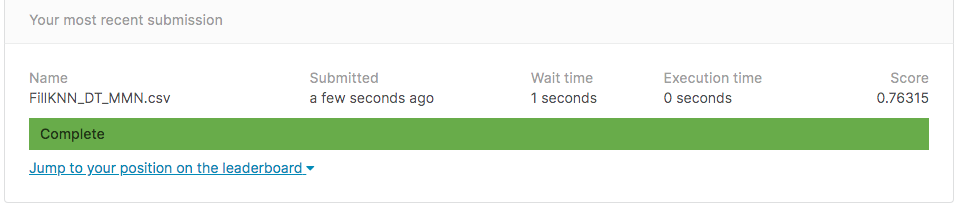

In [217]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_DT = cross_val_score(DT_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("DecisionTree ", "Train", s_DT.mean().round(3)))

DecisionTree  Train Score:	0.852 


#### 4- Bagging classifier

In [65]:
# Instantiate pipeline object.
Bag_pipe = Pipeline([
    ('sscaler2', StandardScaler()),#did standerisation to scale the value of features
    ('Bag', BaggingClassifier())
])

In [66]:
# Define dictionary of hyperparameters.
Bag_pipe_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'Bag__base_estimator':[DecisionTreeClassifier(),KNeighborsClassifier()],
                 'Bag__n_estimators':[10, 50, 200],
                 'Bag__max_samples':[10,50,70,80],
                 'Bag__bootstrap':[True,False],
                  }

In [67]:
# Instantiate our GridSearchCV object.
Bag_pipe_gridsearch = GridSearchCV(Bag_pipe, # What is the model we want to fit?
                                 Bag_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 scoring='roc_auc',
                                   verbose=1)

In [68]:
# Fit the GridSearchCV object to the data.
Bag_pipe_gridsearch.fit(X_train_data, y_train_data)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  5.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('Bag', BaggingClassifier())]),
             param_grid={'Bag__base_estimator': [DecisionTreeClassifier(),
                                                 KNeighborsClassifier()],
                         'Bag__bootstrap': [True, False],
                         'Bag__max_samples': [10, 50, 70, 80],
                         'Bag__n_estimators': [10, 50, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             scoring='roc_auc', verbose=1)

In [69]:
#print best score and best parameters
print('The best score' ,Bag_pipe_gridsearch.best_score_)
print('The score after GridSearch',Bag_pipe_gridsearch.score(X_train_data, y_train_data))
print('the best parameters :')
print( Bag_pipe_gridsearch.best_params_)

The best score 0.8677358280948816
The score after GridSearch 0.9198782475313967
the best parameters :
{'Bag__base_estimator': DecisionTreeClassifier(), 'Bag__bootstrap': True, 'Bag__max_samples': 80, 'Bag__n_estimators': 200, 'sscaler2__with_mean': False, 'sscaler2__with_std': False}


In [72]:
#prediction for the best model in pred_lr_best on Train data
trainpredect_Bag=Bag_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred__best on Test data
testpred_Bag= Bag_pipe_gridsearch.predict(X_test_data)

In [73]:
print(metrics.accuracy_score(y_train_data, trainpredect_Bag))

0.8664421997755332


In [74]:
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpredect_Bag)
print(confusion_matrix)


[[517  32]
 [ 87 255]]


In [75]:
print(metrics.classification_report(y_train_data, trainpredect_Bag))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       549
           1       0.89      0.75      0.81       342

    accuracy                           0.87       891
   macro avg       0.87      0.84      0.85       891
weighted avg       0.87      0.87      0.86       891



In [232]:
testpred_Bag

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
Bag_predictions_df=pd.DataFrame(testpred_Bag,test_data['PassengerId']).reset_index()
Bag_predictions_df.rename(columns={0:'Survived'}, inplace=True)
Bag_predictions_df.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [234]:
Bag_predictions_df.to_csv('FillKNN_Bag_MMN.csv',index=False)#save the dataframe as CSV format file to submitted in kaggle

FillKNN_bag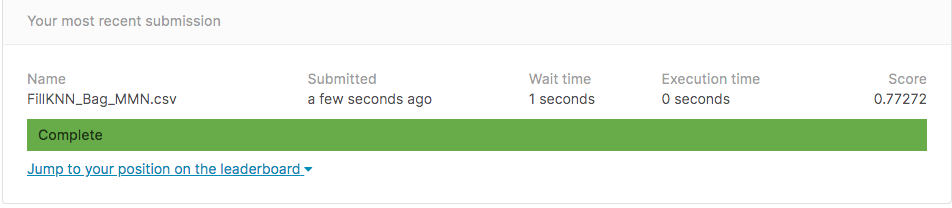

In [77]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_Bag = cross_val_score(Bag_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Bagging classifier ", "Train", s_Bag.mean().round(3)))

Bagging classifier  Train Score:	0.858 


### 5-  Random Forest

In [239]:
# Instantiate pipeline object.
RF_pipe = Pipeline([
    ('sscaler2', StandardScaler()),#did standerisation to scale the value of features
    ('RF', RandomForestClassifier())
])

In [240]:
# Define dictionary of hyperparameters.
RF_pipe_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'RF__n_estimators': [10, 50, 100, 200],
                 'RF__max_features':[2, 3, 5, 7, 8,9],
                 'RF__max_depth': [1, 2, 3, 4, 5, 8],
                 'RF__criterion':['gini', 'entropy'],
                  }

In [241]:
# Instantiate our GridSearchCV object.
RF_pipe_gridsearch = GridSearchCV(RF_pipe, # What is the model we want to fit?
                                 RF_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 scoring='roc_auc',
                                   verbose=1)

In [242]:
# Fit the GridSearchCV object to the data.
RF_pipe_gridsearch.fit(X_train_data, y_train_data)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5760 out of 5760 | elapsed: 26.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('RF', RandomForestClassifier())]),
             param_grid={'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': [1, 2, 3, 4, 5, 8],
                         'RF__max_features': [2, 3, 5, 7, 8, 9],
                         'RF__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             scoring='roc_auc', verbose=1)

In [245]:
#print best score and best parameters
print('The best score' ,RF_pipe_gridsearch.best_score_)
print('The score after GridSearch',RF_pipe_gridsearch.score(X_train_data, y_train_data))
print('the best parameters :')
print( RF_pipe_gridsearch.best_params_)

The best score 0.8734598187463692
The score after GridSearch 0.9722355372340992
the best parameters :
{'RF__criterion': 'gini', 'RF__max_depth': 8, 'RF__max_features': 8, 'RF__n_estimators': 50, 'sscaler2__with_mean': True, 'sscaler2__with_std': True}


In [246]:
#prediction for the best model in pred_lr_best on Train data
trainpredect_RF=RF_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred__best on Test data
testpred_RF= RF_pipe_gridsearch.predict(X_test_data)

In [247]:
print(metrics.accuracy_score(y_train_data, trainpredect_RF))

0.9214365881032548


In [248]:
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpredect_RF)
print(confusion_matrix)


[[538  11]
 [ 59 283]]


In [249]:
print(metrics.classification_report(y_train_data, trainpredect_RF))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       549
           1       0.96      0.83      0.89       342

    accuracy                           0.92       891
   macro avg       0.93      0.90      0.91       891
weighted avg       0.92      0.92      0.92       891



In [250]:
testpred_RF

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [251]:
RF_predictions_df=pd.DataFrame(testpred_RF,test_data['PassengerId']).reset_index()
RF_predictions_df.rename(columns={0:'Survived'}, inplace=True)
RF_predictions_df.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [252]:
RF_predictions_df.to_csv('FillKNN_RF_MMN.csv',index=False)#save the dataframe as CSV format file to submitted in kaggle

FillKNN_RF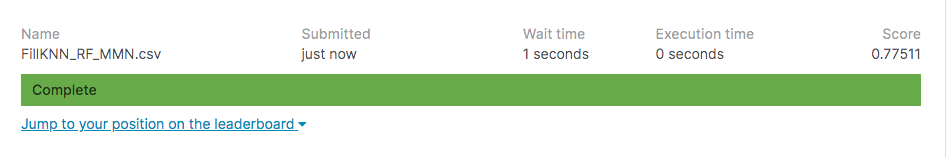

In [253]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_RF = cross_val_score(RF_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Random Forest ", "Train", s_RF.mean().round(3)))

Random Forest  Train Score:	0.856 


 ### 6- Extra Trees

In [78]:
# Instantiate pipeline object.
ET_pipe = Pipeline([
    ('sscaler2', StandardScaler()),#did standerisation to scale the value of features
    ('ET', ExtraTreesClassifier())
])

In [79]:
# Define dictionary of hyperparameters.
ET_pipe_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'ET__n_estimators': [10, 50, 100, 200],
                 'ET__max_features':[2, 3, 5, 7, 8,9],
                 'ET__max_depth': [1, 2, 3, 4, 5, 8],
                 'ET__criterion':['gini', 'entropy'],
                  }

In [80]:
# Instantiate our GridSearchCV object.
ET_pipe_gridsearch = GridSearchCV(ET_pipe, # What is the model we want to fit?
                                 ET_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 scoring='roc_auc',
                                   verbose=1)

In [81]:
# Fit the GridSearchCV object to the data.
ET_pipe_gridsearch.fit(X_train_data, y_train_data)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5760 out of 5760 | elapsed: 18.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('ET', ExtraTreesClassifier())]),
             param_grid={'ET__criterion': ['gini', 'entropy'],
                         'ET__max_depth': [1, 2, 3, 4, 5, 8],
                         'ET__max_features': [2, 3, 5, 7, 8, 9],
                         'ET__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             scoring='roc_auc', verbose=1)

In [82]:
#print best score and best parameters
print('The best score' ,ET_pipe_gridsearch.best_score_)
print('The score after GridSearch',ET_pipe_gridsearch.score(X_train_data, y_train_data))
print('the best parameters :')
print( ET_pipe_gridsearch.best_params_)

The best score 0.8756307081704205
The score after GridSearch 0.9223628287476433
the best parameters :
{'ET__criterion': 'entropy', 'ET__max_depth': 8, 'ET__max_features': 3, 'ET__n_estimators': 10, 'sscaler2__with_mean': False, 'sscaler2__with_std': False}


In [83]:
#prediction for the best model in pred_lr_best on Train data
trainpredect_ET=ET_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred__best on Test data
testpred_ET= ET_pipe_gridsearch.predict(X_test_data)

In [84]:
print(metrics.accuracy_score(y_train_data, trainpredect_ET))

0.8731762065095399


In [85]:
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpredect_ET)
print(confusion_matrix)


[[521  28]
 [ 85 257]]


In [86]:
print(metrics.classification_report(y_train_data, trainpredect_ET))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       549
           1       0.90      0.75      0.82       342

    accuracy                           0.87       891
   macro avg       0.88      0.85      0.86       891
weighted avg       0.88      0.87      0.87       891



In [87]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
ET_predictions_df=pd.DataFrame(testpred_ET,test_data['PassengerId']).reset_index()
ET_predictions_df.rename(columns={0:'Survived'}, inplace=True)
ET_predictions_df.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [270]:
#save the dataframe as CSV format file to submitted in kaggle
ET_predictions_df.to_csv('FillKNN_ET_MMN.csv',index=False)

FillKNN_ET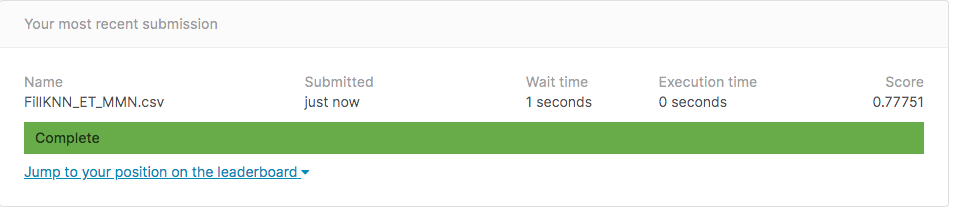

In [88]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_et = cross_val_score(ET_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Random Forest ", "Train", s_et.mean().round(3)))

Random Forest  Train Score:	0.859 


## Conclusion

In [89]:
# we did a dataframe named 'model_df' that conclude the result of each model to make easy comparing between them
model_Table = {'Model':  ['Logistic-Regression', 'Knn-Classifier','Decision-Tree','Bagging-classifier',
                          'Random-Forest','Extra-Trees'],
               'Train_Score': [0.8024, 0.9189,0.8698,0.9104,0.9722,0.9126],
               'Test_Score': [0.755, 0.758,0.7631,0.7727,0.7751,0.7775],
               'Train_Cross_Validation_Score': [0.789 , 0.854 ,0.852,0.858,0.856, 0.859]
               }

model_df = pd.DataFrame (model_Table, columns = ['Model','Train_Score','Test_Score','Train_Cross_Validation_Score'])

model_df.head(6)
#print(model_df)

,Model,Train_Score,Test_Score,Train_Cross_Validation_Score
0,Logistic-Regression,0.8024,0.7550,0.789
1,Knn-Classifier,0.9189,0.7580,0.854
2,Decision-Tree,0.8698,0.7631,0.852
3,Bagging-classifier,0.9104,0.7727,0.858
4,Random-Forest,0.9722,0.7751,0.856
5,Extra-Trees,0.9126,0.7775,0.859


**This table helps us to abestract our work and reach the result in the perfect way.**

we obserived that the best score we got in test score is `'0.7775'`. this score was recorded in `Extra-Trees`.
In addition, this score as we learn in our couse is very good and it indicates that the model did prefectly because if the score nearly to 9 or 1 that mean it has overfit and if the score under 6 or 5 that means the model has bias. So, we got score in the safe and excellent way.